## **Aula 01 - Preparação e  Análise Exploratória de Dados : Perfis de Risco de Crédito: Características de Bons e Maus Clientes**

## Índice

1. [Imports](#imports)  
2. [Sobre os Dados](#dados)
3. [Dicas para uma Excelente Preparação e Análise Exploratória de Dados](#dica-by-jonn)  
3. [Metodologia CRISP-DM](#metodologia-crisp-dm)  
   - 4.1 [Compreensão do Negócio](#compreensao-do-negocio)  
   - 4.2 [Entendimento dos Dados](#entendimento-dos-dados)
      - 4.2.1 [Importação dos Dados](#importação-dos-dados)
      - 4.2.2 [Análise Exploratória dos Dados - Insights Iniciais](#analise-exploratoria-de-dados)
      - 4.2.3 [Tipo de Variáveis](#tipo-de-variaveis)
      - 4.2.4 [Análise de Missing e Zeros](#analise-de-missing-zeros)
      - 4.2.5 [Variável Target](#variavel-target)
      - 4.2.6 [Exploração dos dados - Variáveis Numéricas - Medidas de Tendência Central e de Variação](#exploracao-dados)
      - 4.2.7 [Hipóteses sobre o problema de negócio](#hipoteses)       
      - 4.2.8 [Exploração dos dados - Variáveis Numéricas -  Gráficos](#exploracao-dados-graficos)
      - 4.2.9 [Exploração dos dados - Variáveis Numéricas -  Correlação](#exploracao-dados-correlacao)
      - 4.2.10 [Exploração dos dados - Variáveis Categóricas](#exploracao-dados-categoricos)
      - 4.2.11 [Exploração dos dados - Variáveis Categóricas -  Gráficos](#exploracao-dados-categoricos-graficos)
      - 4.2.12 [Análise Exploratória Bivariada - Variáveis Categóricas vs Target - Gráficos](#exploracao-dados-categoricos-graficos-bivariada)
      - 4.2.13 [Análise Exploratória Bivariada - Variáveis Numéricas vs Target - Gráficos](#exploracao-dados-numericas-graficos-bivariada)
- 5. [Storytelling: A História por Trás dos Números: Como o German Credit Data Revela o Perfil do Crédito Alemão](#resumo-analise-exploratoria)
- 6. [Perfis de Risco de Crédito: Características de Bons e Maus Clientes](#conclusao)

## 1. Imports
<a id="imports"></a>

In [13]:
# Importa a biblioteca pandas, usada para manipulação e análise de dados.
import pandas as pd 

# Importa a biblioteca numpy, usada para manipulação de arrays e operações numéricas.
import numpy as np 

# Importa a biblioteca pyplot do matplotlib, usada para criar gráficos.
from matplotlib import pyplot as plt 

# Importa a biblioteca seaborn, que é uma extensão do matplotlib para criar gráficos mais atraentes e informativos.
import seaborn as sns 

# Importa a biblioteca de warnings para controlar a exibição de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apareçam no terminal durante a execução do código.
warnings.filterwarnings("ignore")

# Exibe todo o conteúdo da célula
pd.set_option('display.max_colwidth', None)  

# Evita que quebre a linha automaticamente
pd.set_option('display.expand_frame_repr', False)  

# Aumenta a largura do display para acomodar mais informações
pd.set_option('display.width', 300)  

## **2. Sobre os Dados**
<a id="dados"></a>

Utilizou-se a base de  dados de acesso livre “German Credit Data”, fornecido pelo Prof. Dr. Hans Hofmann da 
Universidade de Hamburgo, acessado pelo repositório “Center for Machine Learning and  Intelligent Systems (UCI)”.

Abaixo o link para Download do Dataset e Dados Completos:

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data


- Este conjunto de dados classifica pessoas descritas por um conjunto de atributos como riscos de crédito bons ou ruins

In [75]:
# Criação de um dicionário com informações sobre variáveis relacionadas a um cliente e seu crédito
dictionary = {
    "status_account": ("Status da conta corrente existente.", 
                       "A11: < 0 DM (Conta corrente negativa), A12: < 200 (Saldo positivo, mas inferior a 200 DM), A13: >= 200 DM (Saldo de pelo menos 200 DM ou recebendo salário na conta há pelo menos um ano), A14: Sem conta"),
    "duration": ("Duração do crédito em meses.", "O período pelo qual o cliente deverá pagar o empréstimo."),
    "credit_history": ("Histórico de crédito do cliente.", 
                       "A30: Sem créditos, A31: Todos créditos pagos, A32: Pagamentos atrasados no passado, A33: Atraso atual, A34: Crédito crítico"),
    "purpose": ("Propósito do empréstimo.", 
                "A40: Carro novo, A41: Carro usado, A42: Móveis/equipamento, A43: Rádio/TV, A44: Eletrodomésticos, A45: Reparo, A46: Educação, A47: Vazio, A48: Negócios, A49: Outros"),
    "credit_amount": ("Valor do crédito solicitado.", "Valor do crédito solicitado pelo cliente"),
    "savings_account": ("Saldo na conta poupança.", 
                        "A61: < 100 DM, A62: 100 <= ... < 500 DM, A63: 500 <= ... < 1000 DM, A64: >= 1000 DM, A65: Sem conta poupança"),
    "employment_since": ("Tempo de emprego atual.", 
                         "A71: Desempregado, A72: < 1 ano, A73: 1 <= ... < 4 anos, A74: 4 <= ... < 7 anos, A75: >= 7 anos"),
    "installment_rate": ("Taxa do parcelamento.", "Taxa do parcelamento"),
    "personal_status": ("Status pessoal e sexo do cliente.", 
                        "A91: Masculino, solteiro, A92: Masculino, casado, A93: Masculino, divorciado, A94: Feminino"),
    "other_debtors": ("Existência de outros devedores ou fiadores.", 
                      "A101: Nenhum, A102: Co-devedor, A103: Fiador"),
    "residence_since": ("Tempo de residência no endereço atual.", "Tempo de residência no endereço atual"),
    "property": ("Tipo de bem possuído (ex.: imóvel, carro).", 
                 "A121: Imóvel, A122: Seguro de vida, A123: Carro, A124: Nenhuma propriedade"),
    "age": ("Idade do cliente.", "Idade do cliente em anos"),
    "other_installment": ("Existência de outros financiamentos.", 
                          "A141: Banco, A142: Lojas, A143: Nenhum"),
    "housing": ("Situação de moradia (ex.: aluguel, própria).", 
                "A151: Aluguel, A152: Própria, A153: Gratuita"),
    "existing_credits": ("Número de créditos existentes no banco.", "Número de créditos existentes no banco"),
    "job": ("Categoria de ocupação do cliente.", 
            "A171: Desempregado, A172: Não qualificado, A173: Qualificado, A174: Executivo/autônomo"),
    "people_liable": ("Número de pessoas dependentes.", "Número de pessoas dependentes"),
    "telephone": ("Se o cliente possui telefone cadastrado.", 
                  "A191: Não, A192: Sim"),
    "foreign_worker": ("Se o cliente é trabalhador estrangeiro.", 
                       "A201: Sim, A202: Não"),
    "creditability": ("Classe do cliente (1 = bom pagador, 2 = mau pagador).", 
                      "1: Bom pagador, 2: Mau pagador")
}

# Criação de um DataFrame a partir do dicionário, onde "items()" converte as chaves e valores do dicionário em pares
dict_df = pd.DataFrame(dictionary.items(), columns=["Variável", "Info"])

# Separação da coluna "Info" em duas colunas: "Descrição" (primeiro valor da tupla) e "Categorias" (segundo valor da tupla)
dict_df["Descrição"] = dict_df["Info"].apply(lambda x: x[0])
dict_df["Categorias"] = dict_df["Info"].apply(lambda x: x[1])

# Adição de uma nova coluna "Tipo" para indicar o tipo de variável (Numérica ou Categórica)
dict_df["Tipo"] = dict_df["Variável"].apply(lambda x: "Numérica" if x in [
    "duration", "credit_amount", "installment_rate", "residence_since", 
    "age", "existing_credits", "people_liable",'creditability'
] else "Categórica")

# Remoção da coluna auxiliar "Info" que não será mais necessária
dict_df.drop(columns=["Info"], inplace=True)

# Exibição do DataFrame resultante
display(dict_df)



,Variável,Descrição,Categorias,Tipo
0,status_account,Status da conta corrente existente.,"A11: < 0 DM (Conta corrente negativa), A12: < 200 (Saldo positivo, mas inferior a 200 DM), A13: >= 200 DM (Saldo de pelo menos 200 DM ou recebendo salário na conta há pelo menos um ano), A14: Sem conta",Categórica
1,duration,Duração do crédito em meses.,O período pelo qual o cliente deverá pagar o empréstimo.,Numérica
2,credit_history,Histórico de crédito do cliente.,"A30: Sem créditos, A31: Todos créditos pagos, A32: Pagamentos atrasados no passado, A33: Atraso atual, A34: Crédito crítico",Categórica
3,purpose,Propósito do empréstimo.,"A40: Carro novo, A41: Carro usado, A42: Móveis/equipamento, A43: Rádio/TV, A44: Eletrodomésticos, A45: Reparo, A46: Educação, A47: Vazio, A48: Negócios, A49: Outros",Categórica
4,credit_amount,Valor do crédito solicitado.,Valor do crédito solicitado pelo cliente,Numérica
5,savings_account,Saldo na conta poupança.,"A61: < 100 DM, A62: 100 <= ... < 500 DM, A63: 500 <= ... < 1000 DM, A64: >= 1000 DM, A65: Sem conta poupança",Categórica
6,employment_since,Tempo de emprego atual.,"A71: Desempregado, A72: < 1 ano, A73: 1 <= ... < 4 anos, A74: 4 <= ... < 7 anos, A75: >= 7 anos",Categórica
7,installment_rate,Taxa do parcelamento.,Taxa do parcelamento,Numérica
8,personal_status,Status pessoal e sexo do cliente.,"A91: Masculino, solteiro, A92: Masculino, casado, A93: Masculino, divorciado, A94: Feminino",Categórica
9,other_debtors,Existência de outros devedores ou fiadores.,"A101: Nenhum, A102: Co-devedor, A103: Fiador",Categórica


## **3. Dicas para uma excelente Preparação e Análise Exploratória de Dados**
<a id="dica-by-jonn"></a>

#### 1. Brainstorming:
 
##### O brainstorming ajudará a entender o objetivo da análise e como os dados podem ser usados para atender às necessidades do negócio. 
##### Pergunte: "Como as variáveis presentes nos dados podem impactar diretamente a solução do problema?"

1. Identificação do Problema (Qual problema estamos tentando resolver?, Quem se beneficiará com a solução?, Esse problema já foi abordado de alguma forma antes?)
2. Identifique como as variáveis podem influenciar a solução.
3. Envolva a equipe para gerar ideias sobre o uso dos dados.
4. Tenha uma abordagem crítica para as ideias apresentadas.


##### 2. Mapa Mental de Hipóteses:
##### Utilizar mapas mentais para criar hipóteses pode ser uma excelente maneira de organizar as ideias.
##### A partir dessas hipóteses, é possível direcionar a análise exploratória e testar as relações entre variáveis.
##### Além disso, é importante ter uma abordagem crítica para validar ou refutar essas hipóteses com os dados.


1. Uso de mapas mentais para visualizar relações entre variáveis.
2. Crie hipóteses baseadas no conhecimento do problema e nos dados disponíveis.
3. Teste as hipóteses com técnicas de análise exploratória (EDA).
4. Valide ou refute as hipóteses com os resultados obtidos.


#### 3. Engenharia de Atributos:

##### A criação de novas variáveis a partir das variáveis existentes pode enriquecer a análise.
##### A engenharia de atributos é uma das etapas mais poderosas para melhorar a performance dos modelos de Aprendizado de Máquina, 
##### pois pode capturar padrões e relações que não são evidentes nas variáveis originais.


1. Crie variáveis derivadas, como interações entre atributos ou transformações.
2. Explore variáveis temporais.
3. Considere a combinação de variáveis para formar novos recursos.
4. Teste diferentes abordagens de engenharia de atributos para ver qual agrega mais valor ao modelo.


####  4. Viéses:

##### Variáveis como Personal_Status (status pessoal) e Foreign_Worker (trabalhador estrangeiro) podem introduzir vieses  ?  

##### É importante ficar atento ao víes algorítmico e discriminação ao desenvolver uma solução de dados


1. Verifique se existem variáveis que podem introduzir vieses nos resultados.
2. Considere a necessidade de remover ou transformar essas variáveis para evitar discriminação.
3. Faça uma análise de fairness para garantir que o modelo não favorece ou penaliza grupos de maneira injusta.
4. Teste modelos sem essas variáveis para verificar o impacto no resultado final.


#### 5. Tratamento Adequado para Variáveis:

##### Variáveis numéricas e categóricas exigem tratamentos específicos.
##### A normalização de dados numéricos, a codificação de variáveis categóricas e o tratamento de valores ausentes são etapas essenciais 
##### para garantir que as variáveis sejam adequadas ao tipo de análise ou modelo.


1. Normalização e padronização de variáveis numéricas.
2. Codificação de variáveis categóricas (e.g., One-Hot Encoding).
3. Identificação e/ou Tratamento de valores ausentes (imputação , remoção, no action).
4. Verifique outliers que podem distorcer os resultados.


#### 6. Origem das Variáveis:

##### As variáveis podem ser de origem Cadastral (informações do cliente, como idade, estado civil, profissão) 
##### de Relacionamento (informações financeiras ou de crédito, como histórico de crédito, valor de crédito solicitado).
##### Essa organização ajuda a identificar relações importantes entre as variáveis e a entender o impacto de cada grupo na solução do problema.

1. Agrupe variáveis em categorias, como 'Cadastral' e 'Relacionamento'.
2. Avalie a relevância de cada grupo para a solução do problema.
3. Analise como os grupos de variáveis influenciam o risco ou o comportamento do cliente.
4. Teste a separação de variáveis em grupos para facilitar a modelagem.

## **4. Metodologia CRISP-DM**
<a id="metodologia-crisp-dm"></a>

O “Cross Industry Standard Process for Data Mining [CRISP-DM]” trata-se de um modelo de processo, com seis etapas Shearer (2000), ilustrado na Figura 1. Está sendo amplamente utilizada para ajudar a planejar e desenvolver projetos de ciência de dados.

<p align="center">
  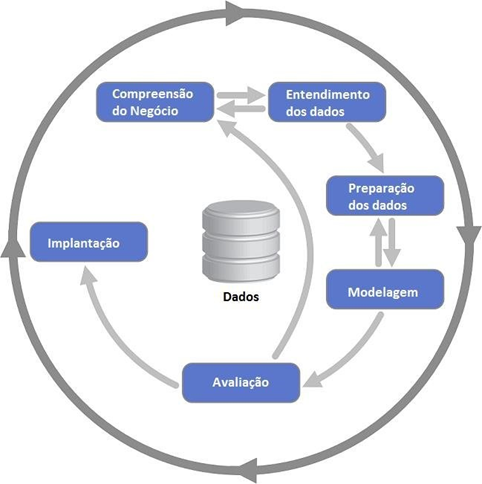
  <br>
</p>

<p align="center">
  Figura 1: Etapas do Framework CRISP-DM
</p>

### **4.1. Compreensão do Negócio**
<a id="compreensao-do-negocio"></a>

### Contextualização do problema de negócio:




##### Detalhes do dataset:
    
O conjunto de dados do Banco Alemão contém informações sobre 1.000 clientes que  solicitaram empréstimo no passado e contém 20 variáveis independentes relacionadas ao perfil desses solicitantes. A marcação de um cliente ruim para  um crédito já concedido pode variar de acordo com as definições internas do banco, mas  geralmente estão relacionadas ao atraso no pagamento da(s) parcela(s) em um determinado  tempo, no caso do presente estudo não foi disponibilizada a descrição de qual conceito foi  utilizado, contendo apenas o status de risco do crédito.

Quando um cliente solicita um pedido de crédito, o banco precisa identificar o perfil  desse cliente para decidir se realiza ou não a aprovação desse empréstimo, para não ter  prejuízos no caso de o cliente não pagar o valor concedido, ou seja, se uma empresa oferece  crédito ao seu cliente, sempre existe o risco de que seus clientes não paguem. Assim, a  construção de modelos de risco de crédito é utilizada nessa decisão, pois a partir de  informações dos perfis demográficos, socioeconômicos e de relacionamento com a empresa é possível estimar a probabilidade de inadimplência em empréstimos de novos clientes, possibilitando uma melhor qualidade na concessão do empréstimo,  reduzindo a inadimplência e aumentando a receita.

##### Objetivo :
        
 Realizar preparação e análise exploratória de dados para um problema de risco de crédito.


##### Estrategia Adotada para solução do problema de negócio:


A Estrategia adotada é realizar uma preparação e análise exploratória de dados que possa apresentar as principais características do cliente/solicitante em relação ao risco de crédito, para isso a construção do projeto seguiu as etapas do CRISP-DM destacadas abaixo:


* 01. Compreensão dos dados


Já descrita acima (item: sobre dos dados)


* 02. Entendimento dos dados

 Analisar o dataset como dimensoes, formatos e dados faltantes e análise exploratória de dados (EDA) do tipo univariada e bivariada. Ao final será apresentado um perfil comparativo de risco de crédito (Bom vs Mau crédito)


### **4.2. Entendimento dos dados**
<a id="entendimento-dos-dados"></a>

Esta etapa consiste desde a captura dos dados até a identificação de problemas relacionados à qualidade. Nesta fase é também onde se formam hipóteses em cima do que se aprendeu com os dados.

#### **4.2.1.Importação dos Dados**
<a id="importação-dos-dados"></a>

In [15]:
# Carregar o dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"  # URL do dataset

 # Lista de nomes das colunas
    
columns = ["status_account", "duration", "credit_history", "purpose", "credit_amount", "savings_account", 
           "employment_since", "installment_rate", "personal_status", "other_debtors", "residence_since", "property",
           "age", "other_installment", "housing", "existing_credits", "job", "people_liable", "telephone", "foreign_Worker", "creditability"] 

# Ler os dados a partir do arquivo .data na URL fornecida

df = pd.read_csv(data_url, sep=' ', names=columns)  # Carrega os dados separados por espaços e define os nomes das colunas

# Exibir as 3 primeiras linhas do DataFrame para verificar a estrutura dos dados
df.head(3)


,status_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status,other_debtors,...,property,age,other_installment,housing,existing_credits,job,people_liable,telephone,foreign_Worker,creditability
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


#### 4.2.2.Análise Exploratória dos Dados - Insights Iniciais
<a id="analise-exploratoria-de-dados"></a>

O objetivo deste etapa é fazer dois tipos de explorações sob os dados:


* Enriquecer o conjunto de dados (dataset) com o levantamento de metadados como dimensão, tipos de atributos e medidas de resumo;

* Explorar analiticamente o dataset com o uso de estatística descritiva (medida de tendência central e de variabilidade), além de visualização dos dados  para se ter ideias de tipos de análises que podem ser realizadas. Como aqui se trata da primeira exploração de dados, a seguir serão definidas algumas propostas de análises com a finalidade de tornar os estudos mais bem direcionados.

In [16]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 1000
Número de atributos do dataset: 21


In [17]:
df.shape

(1000, 21)

In [18]:
# verifica linhas duplicadas

df.duplicated().sum()

0

#### Análise e Insights

 - Não foram encontradas instâncias duplicadas no dataset

#### 4.2.3.Tipo de Variáveis
<a id="tipo-de-variaveis"></a>

In [19]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   status_account     1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   credit_amount      1000 non-null   int64 
 5   savings_account    1000 non-null   object
 6   employment_since   1000 non-null   object
 7   installment_rate   1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residence_since    1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  other_installment  1000 non-null   object
 14  housing            1000 non-null   object
 15  existing_credits   1000 non-null   int64 
 16  job                1000 non-null   object
 

In [20]:
# separando em listas: variáveis numéricas e categóricas
num_vars = df.select_dtypes(include=['number']).columns.tolist()  # Seleciona as colunas com tipo numérico
num_vars = num_vars[:-1]  # Remover a target (coluna de classe ou resultado) da lista de variáveis numéricas

cat_vars = df.select_dtypes(exclude=['number']).columns.tolist()  # Seleciona as colunas que não são numéricas (categóricas)

# Exibindo os resultados
print("Variáveis Numéricas:", num_vars)  # Imprime as variáveis numéricas
print("Variáveis Categóricas:", cat_vars)  # Imprime as variáveis categóricas
print("Qtd Variáveis Numéricas:", len(num_vars))  # Imprime a quantidade de variáveis numéricas
print("Qtd Variáveis Categóricas:", len(cat_vars))  # Imprime a quantidade de variáveis categóricas
print("Variável Resposta:", df.creditability.dtypes)  # Imprime o tipo da variável resposta

Variáveis Numéricas: ['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'existing_credits', 'people_liable']
Variáveis Categóricas: ['status_account', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'personal_status', 'other_debtors', 'property', 'other_installment', 'housing', 'job', 'telephone', 'foreign_Worker']
Qtd Variáveis Numéricas: 7
Qtd Variáveis Categóricas: 13
Variável Resposta: int64


#### Análise e Insights

- A base de dados contém 21 variáveis e 1.000 observações


- 7 variáveis estão como numéricas (int64)
- 13 variáveis como categóricas
- E A variável resposta (creditability) está como int64

#### 4.2.4.Análise de Missing e Zeros
<a id="analise-de-missing-zeros"></a>

In [21]:
# Calcular percentual de valores ausentes e zeros para cada variável

# Percentual de valores ausentes (NaN) para cada variável
missing_percent = df.isnull().mean() * 100  # O método isnull() retorna um DataFrame booleano onde True indica valores ausentes. Mean() calcula a média (porcentagem) de valores ausentes.

# Percentual de zeros para cada variável
zeros_percent = (df == 0).mean() * 100  # O código (df == 0) cria um DataFrame booleano, onde True representa zeros. Mean() calcula a porcentagem de zeros.

# Criar um DataFrame para mostrar os resultados de valores ausentes e zeros
missing_zeros_df = pd.DataFrame({
    'features': df.columns,  # Coluna com o nome das variáveis
    'missing': missing_percent,  # Coluna com percentual de valores ausentes
    'zeros': zeros_percent  # Coluna com percentual de zeros
})

# Resetando o índice para garantir que não haja problemas com duplicação de colunas
missing_zeros_df.reset_index(drop=True, inplace=True)

# Ordenar o DataFrame pelas variáveis com maior percentual de valores ausentes
missing_zeros_df = missing_zeros_df.sort_values(by='missing', ascending=False)  # Ordena o DataFrame pela coluna 'missing', de forma decrescente.

# Exibir o DataFrame corrigido com a coluna 'features' com o nome correto
missing_zeros_df = missing_zeros_df[['features', 'missing', 'zeros']]  # Selecionando apenas as colunas desejadas

# Exibir o DataFrame final
missing_zeros_df


,features,missing,zeros
0,status_account,0.0,0.0
11,property,0.0,0.0
19,foreign_Worker,0.0,0.0
18,telephone,0.0,0.0
17,people_liable,0.0,0.0
16,job,0.0,0.0
15,existing_credits,0.0,0.0
14,housing,0.0,0.0
13,other_installment,0.0,0.0
12,age,0.0,0.0


#### Análise e Insights

- Não temos variáveis com missing e zeros



#### 4.2.5. Variável Target (Creditability)
<a id="variavel-target"></a>

O objetivo do estudo é identificar o perfil de clientes inadimplentes.
De acordo com a descrição do dataset contido na plataforma UCI, a variável 'Creditability' é a variável 
que contém esse rótulo, ou seja: O recurso 'Creditability' assume "1" em caso de bom crédito e "2" caso contrário. No nosso dataset essa variável
foi renomeada para target

In [22]:
# criando a variável target sendo 1 para mau e 0 para bom que é o formato mais comum (1 para evento e 0 para não evento)
df['target'] = np.where(df['creditability'] == 2,1,0).astype(int)

In [23]:
df['target'].value_counts()

target
0    700
1    300
Name: count, dtype: int64

In [24]:
df['target'].value_counts(normalize=True)

target
0    0.7
1    0.3
Name: proportion, dtype: float64

In [25]:
df.head(2)

,status_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status,other_debtors,...,age,other_installment,housing,existing_credits,job,people_liable,telephone,foreign_Worker,creditability,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,1


Text(0.5, 1.0, 'Distribuição da variável resposta')

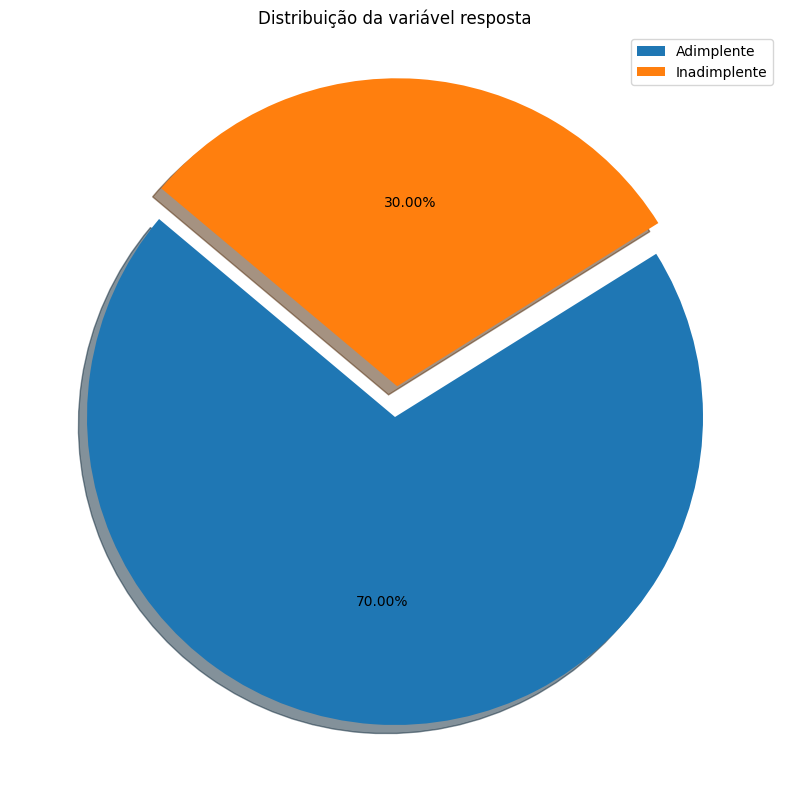

In [26]:
# Define o tamanho da figura do gráfico (10x10 polegadas)
plt.figure(figsize=(10,10))

# Define a "explosão" para as fatias do gráfico de pizza
# A explosão destaca a segunda fatia (0.1), enquanto a primeira fatia não é destacada (0).
# Isso pode ser usado para dar mais destaque a uma das categorias.
explode = [0, 0.1]

# Cria o gráfico de pizza (pie chart)
# df['target'].value_counts() conta as ocorrências de cada valor na coluna 'target'
# explode define o destaque das fatias
# autopct='%1.2f%%' exibe as porcentagens das fatias no gráfico com 2 casas decimais
# shadow=True adiciona uma sombra ao gráfico para dar um efeito tridimensional
# startangle=140 define o ângulo de início do gráfico, em graus (140 graus gira o gráfico para que a primeira fatia fique na parte superior)
plt.pie(df['target'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True, startangle=140)

# Adiciona uma legenda ao gráfico com os rótulos para cada categoria (Adimplente e Inadimplente)
plt.legend(labels=['Adimplente', 'Inadimplente'])

# Define o título do gráfico
plt.title('Distribuição da variável resposta')


### Análise e Insights:

 - 70% dos solicitantes com bom risco de crédito (Adimplentes) e 30% com risco de crédito ruim (Inadimplentes).
 
 
 - Entretanto, mesmo existindo um certo desbalanceamento entre as classes da variável resposta, acredito que não seja um problema de evento raro, logo, não irá fazer parte desse estudo nenhuma técnica de balanceamento amostral

#### 4.2.6.Exploração dos dados - Variáveis Numéricas -  Medidas de Tendência Central e de Variação
<a id="exploracao-dados"></a>

In [27]:
df[num_vars].describe(percentiles = [0.01,0.75, 0.99])

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
1%,6.000000,425.830000,1.000000,1.000000,20.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
99%,60.000000,14180.390000,4.000000,4.000000,67.010000,3.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


#### 4.2.7.  Hipóteses sobre o problema de negócio
<a id="hipoteses"></a>

##### Hipóteses para o Dataset German Credit Data

#### 1. Hipóteses sobre a variável 'Age'
- Clientes mais jovens têm maior risco de inadimplência ?

#### 2. Hipóteses sobre a variável 'Status_Account'
- Clientes com status de conta positivo têm menor risco de inadimplência ?

#### 3. Hipóteses sobre a variável 'Duration'
- Clientes com uma maior duração de empréstimo apresentam maior risco de inadimplência ?

#### 4. Hipóteses sobre a variável 'Installment_Rate'
- Clientes com uma taxa de parcelamento mais baixa apresentam menor risco de inadimplência ?

##### 5. Hipóteses sobre a variável 'Property'
- **Hipótese 5.2**: Clientes sem propriedade têm maior risco de inadimplência ?


#### 4.2.8.Exploração dos dados - Variáveis Numéricas -  Gráficos
<a id="exploracao-dados-graficos"></a>

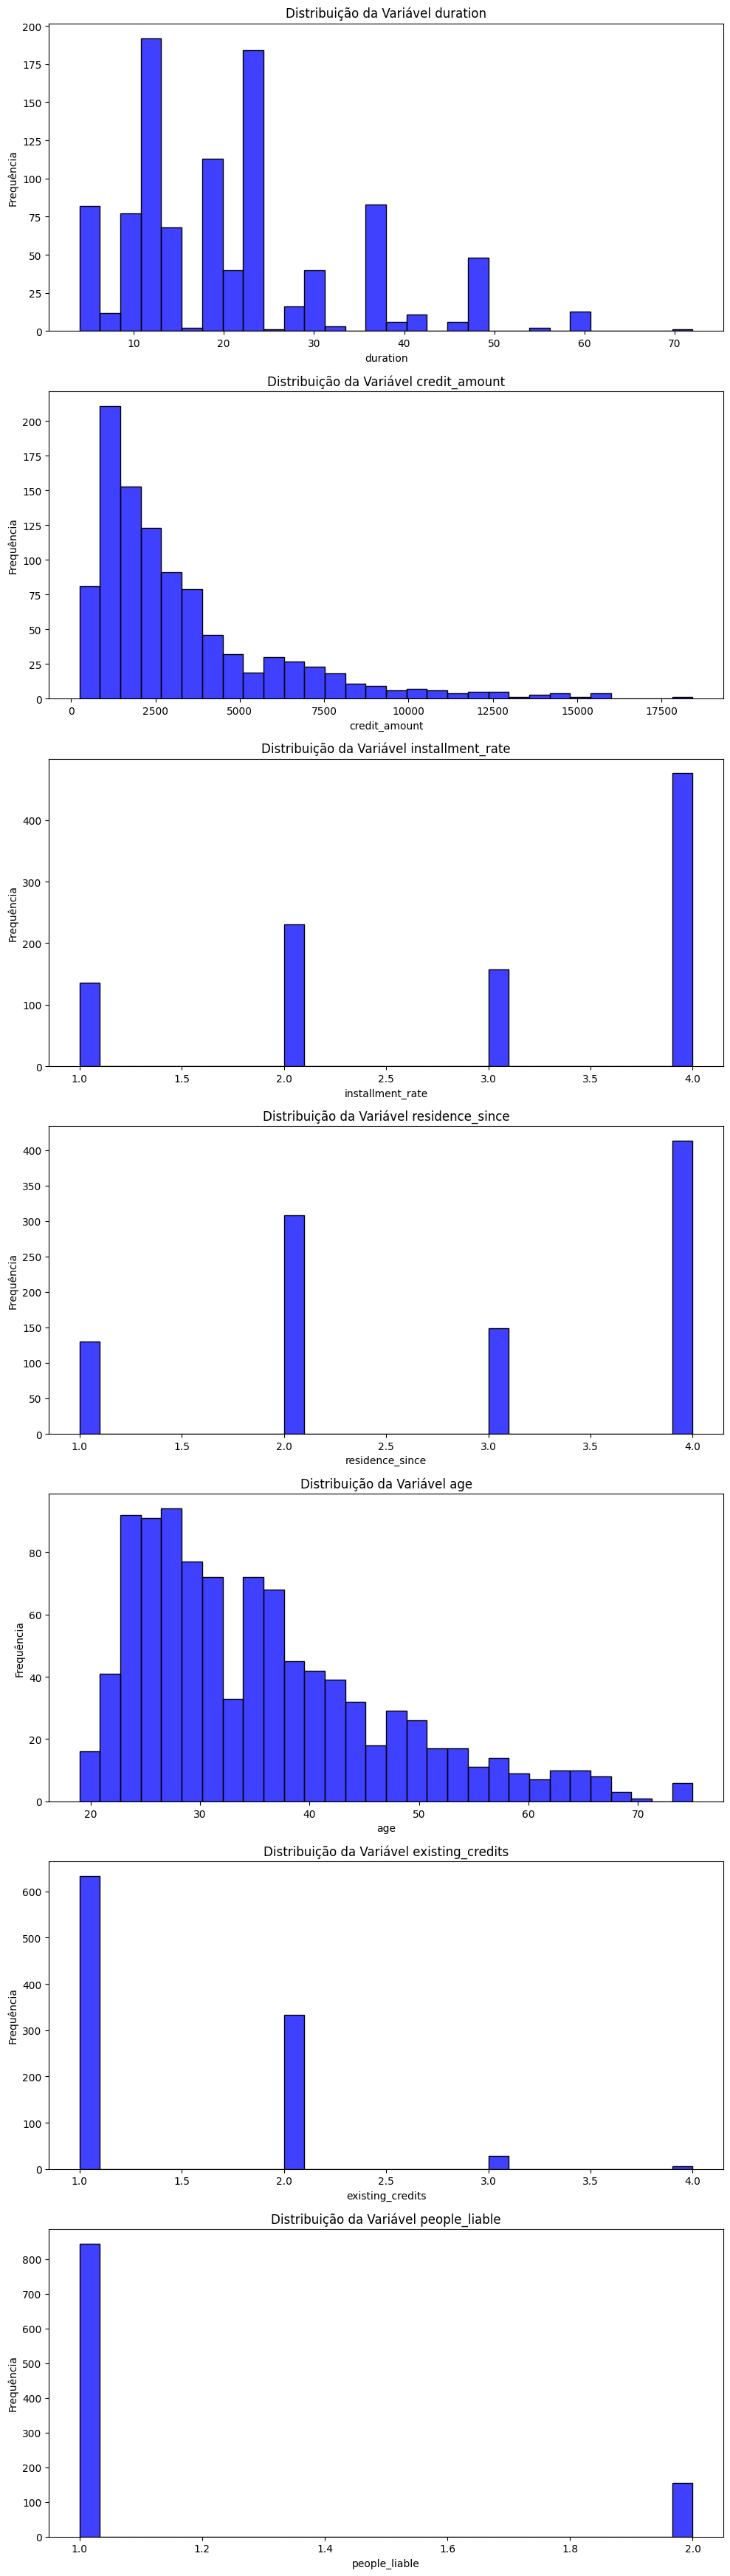

In [28]:
# Criar uma figura com múltiplos histogramas
# Utiliza o método subplots do matplotlib para criar uma figura com múltiplos subgráficos (axes)
# nrows= len(num_vars) cria uma linha de gráficos, uma para cada variável numérica
# ncols=1 define que teremos uma coluna de subgráficos
# figsize=(10, 5 * len(num_vars)) define o tamanho da figura com base no número de variáveis numéricas, aumentando a altura conforme necessário
fig, axes = plt.subplots(nrows=len(num_vars), ncols=1, figsize=(10, 5 * len(num_vars)))

# Criar um histograma para cada variável numérica
# O loop for percorre todas as variáveis numéricas
for i, var in enumerate(num_vars):
    # Utiliza o Seaborn para criar um histograma para cada variável, passando o eixo específico (ax=axes[i])
    # color="blue" define a cor do histograma
    # bins=30 define o número de barras (bins) no histograma
    sns.histplot(df[var], ax=axes[i], color="blue", bins=30)
    
    # Define o título do gráfico para cada variável
    axes[i].set_title(f'Distribuição da Variável {var}')
    
    # Define o rótulo no eixo x (nome da variável)
    axes[i].set_xlabel(var)
    
    # Define o rótulo no eixo y (Frequência)
    axes[i].set_ylabel('Frequência')

# Ajusta o layout dos subgráficos para que fiquem bem organizados e sem sobreposição
plt.tight_layout()

# Exibe os gráficos gerados
plt.show()


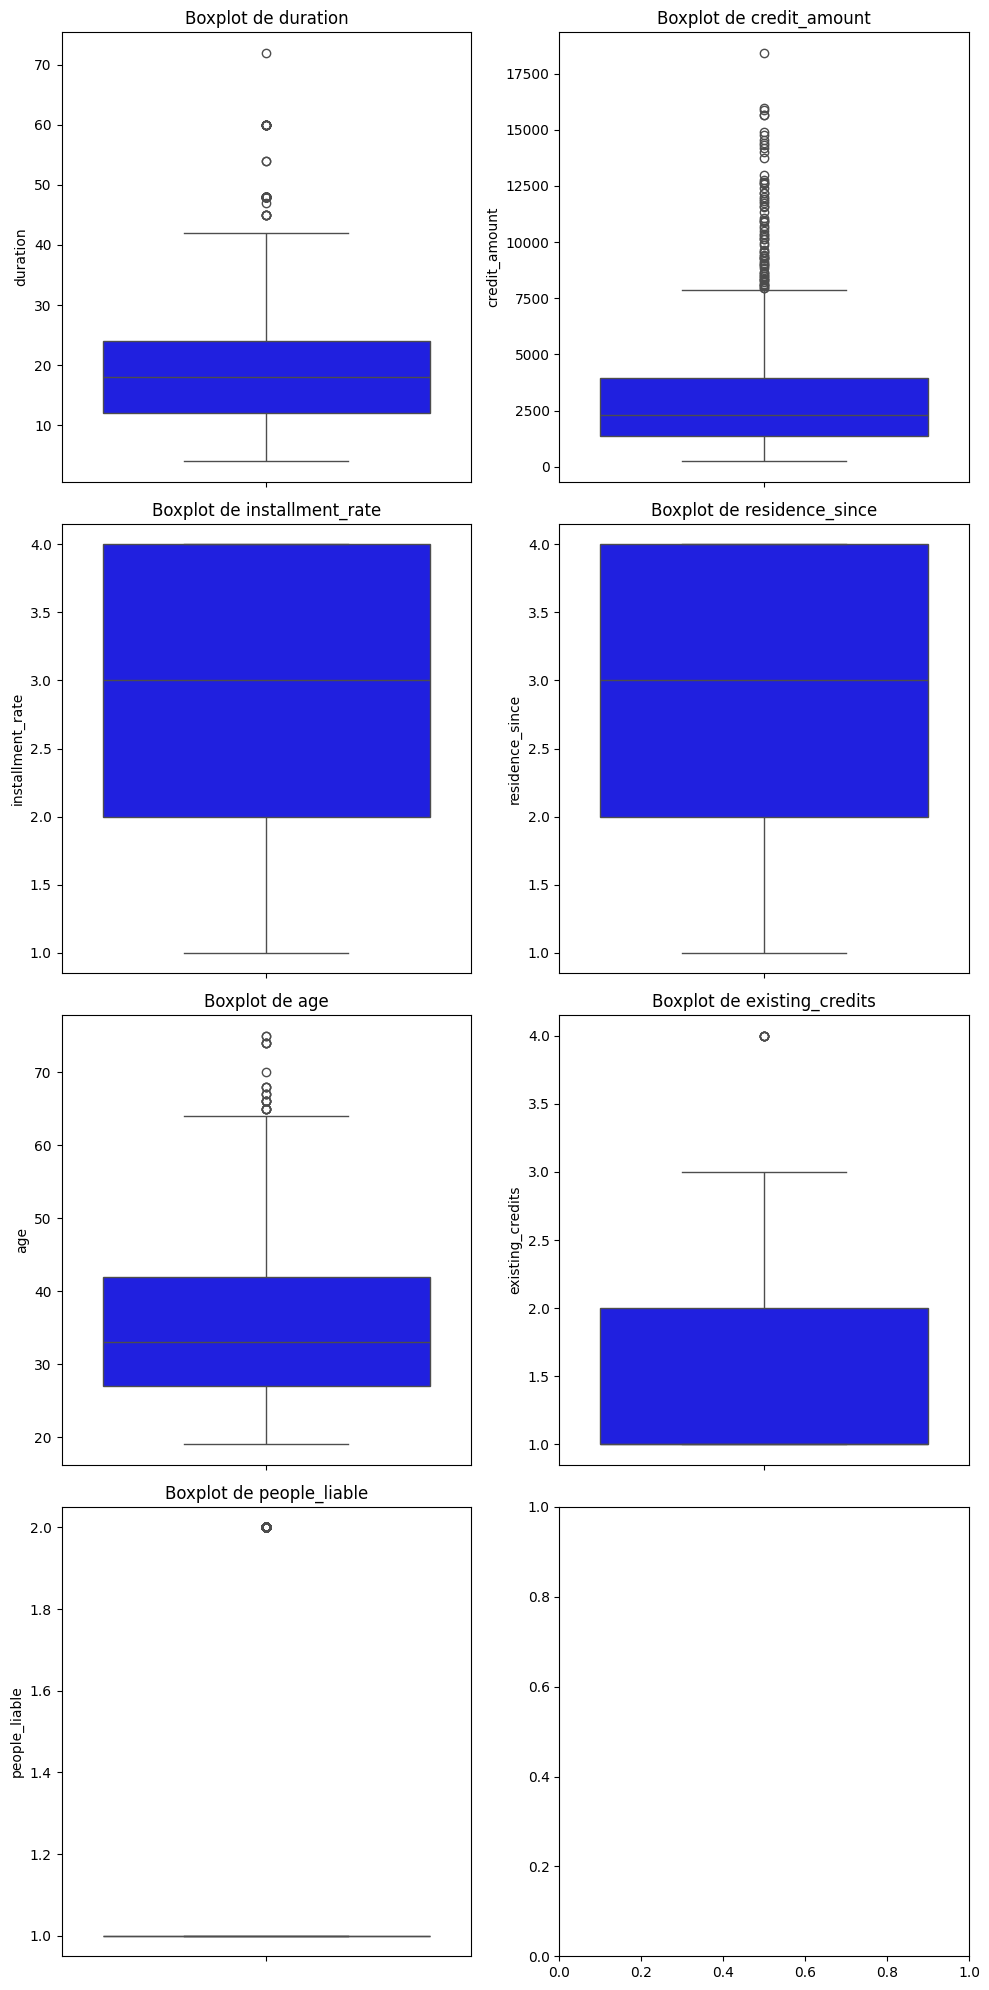

In [29]:
import math

# Calcular o número de linhas necessárias para exibir 2 boxplots por linha
ncols = 2  # número de colunas (2 boxplots por linha)
nrows = math.ceil(len(num_vars) / ncols)  # número de linhas necessárias

# Criar uma figura com múltiplos boxplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))

# Fazer o loop para criar um boxplot para cada variável numérica
for i, var in enumerate(num_vars):
    row = i // ncols  # Calcula a linha onde o boxplot será colocado
    col = i % ncols   # Calcula a coluna onde o boxplot será colocado
    sns.boxplot(y=df[var], ax=axes[row, col], color="blue")  # Cria o boxplot
    axes[row, col].set_title(f'Boxplot de {var}')  # Define o título para cada boxplot
    axes[row, col].set_ylabel(var)  # Define o rótulo do eixo y (nome da variável)

# Ajusta o layout dos gráficos para que fiquem bem organizados
plt.tight_layout()

# Exibe os gráficos gerados
plt.show()


#### Análises e Insights

#### Variáveis numéricas


 -  A variável 'Duration of Credit (month)' refere-se ao tempo em meses do relacionamento do cliente/solicitante com o banco. E de acordo com as estatísticas descritivas, a média do tempo de relacionamento são de 20 meses, ou seja, quase 2 anos. Observa-se também que o cliente com menor tempo de relacionamento possui 4 meses e o maior é de 72 meses (6 anos).


- A variável 'Credit Amount' é o valor solicitado pelo cliente, e aqui podemos ver que a média do empréstimo é de 3.271 sendo o valor mínimo de 250 e máximo de 18 mil.


- A idade média dos solicitantes de crédito é de 35 anos, com mínimo de 19 e máximo de 75 anos.


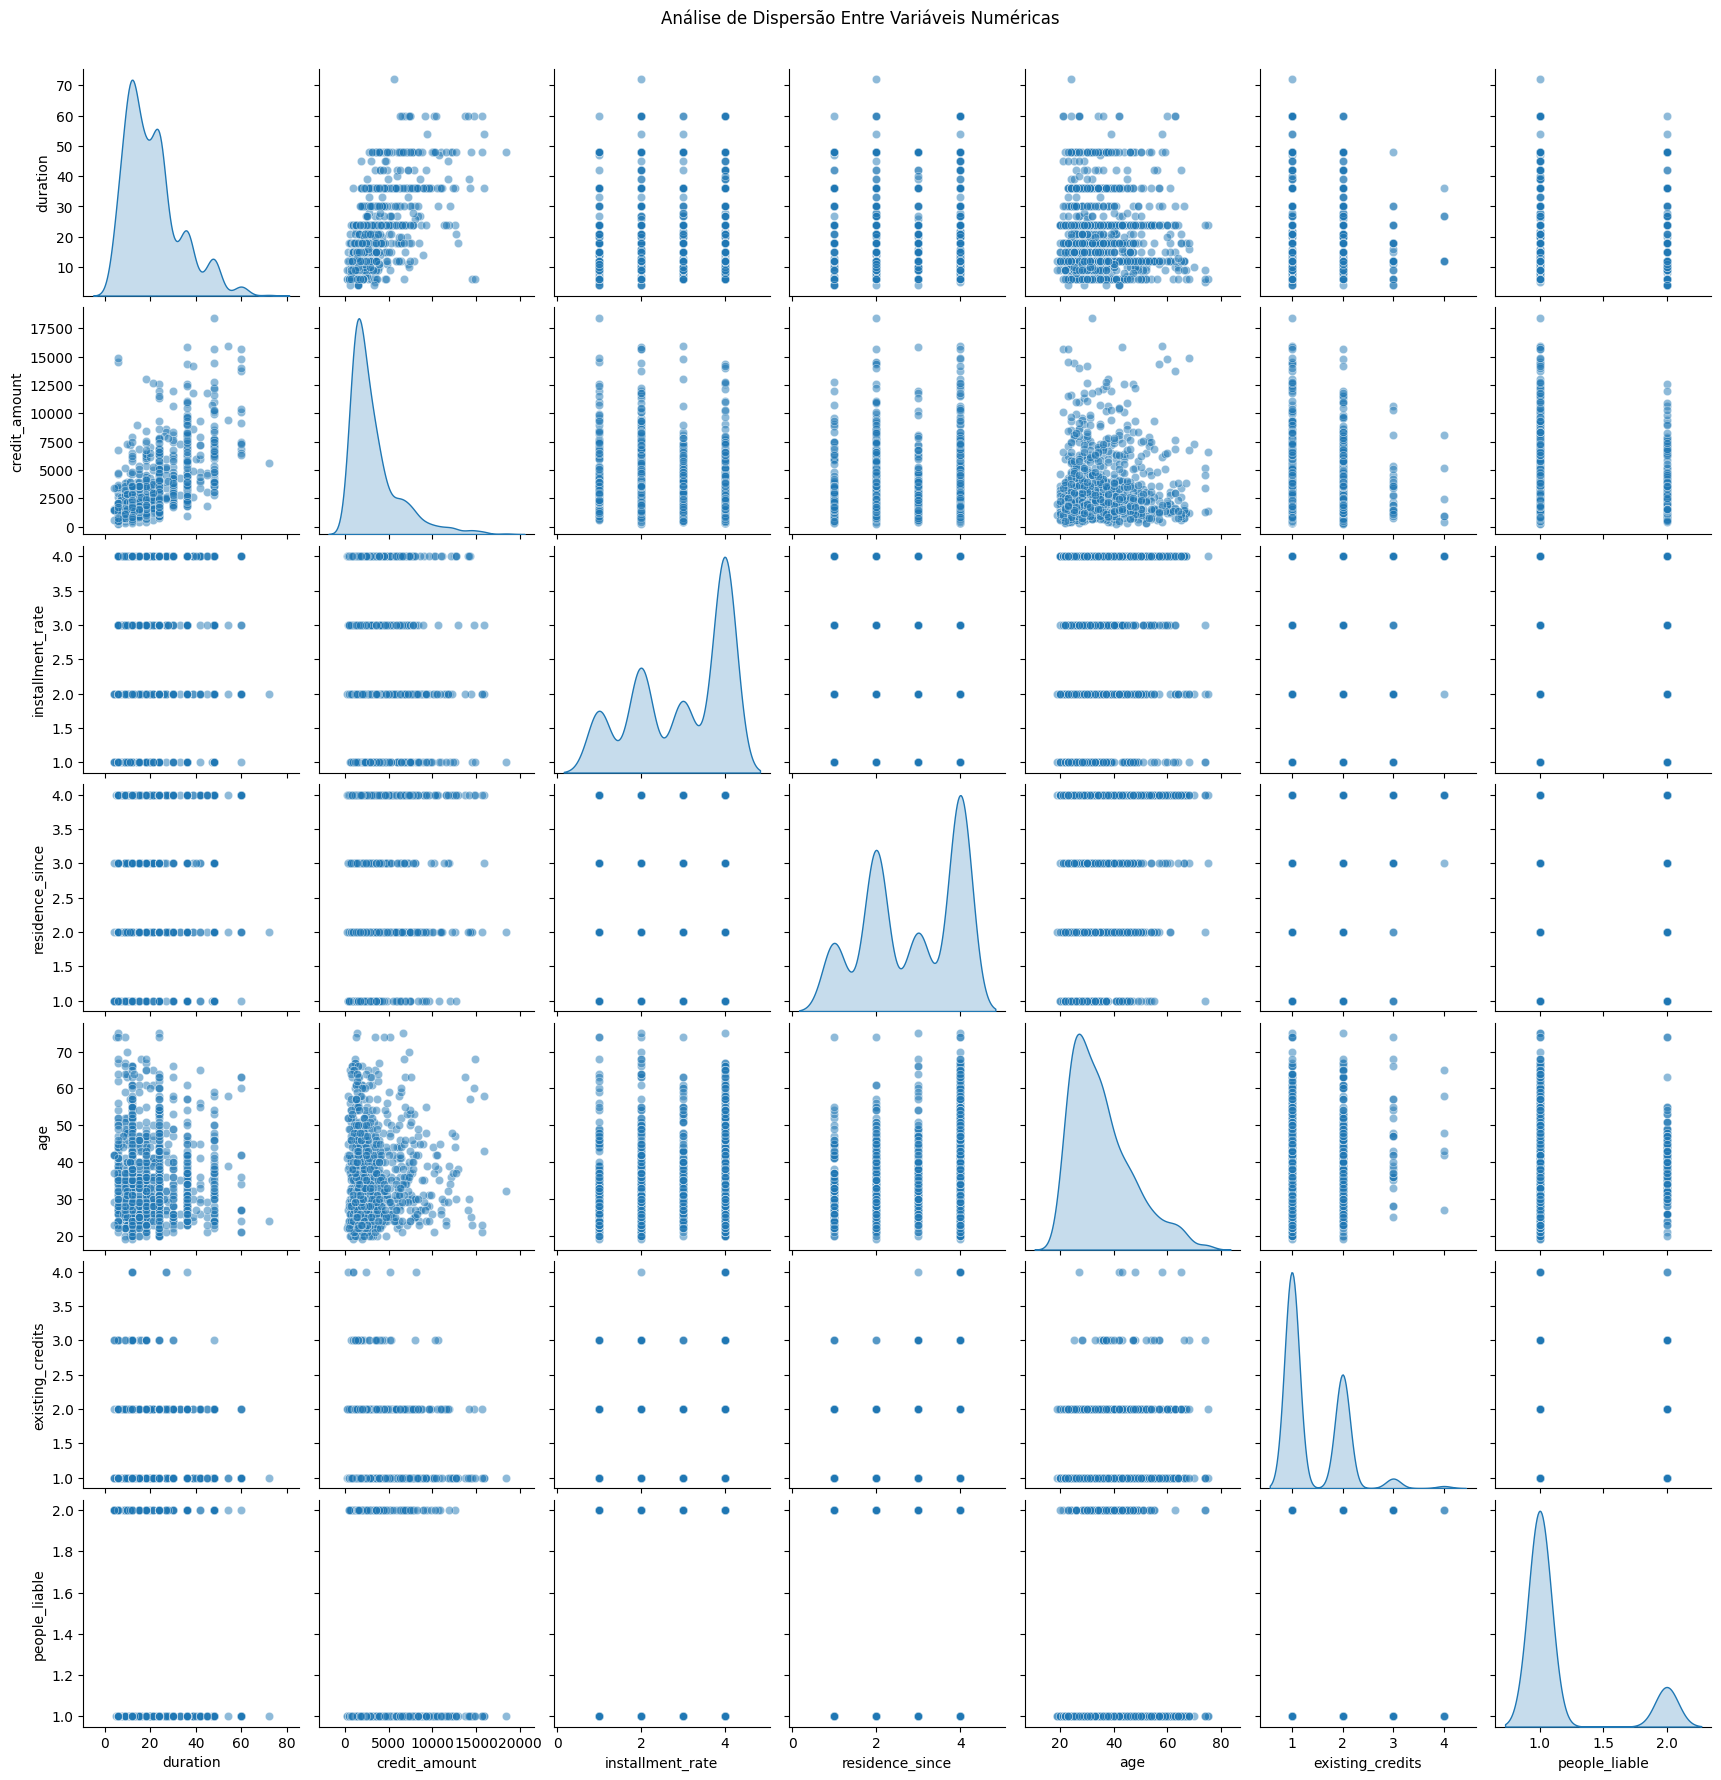

In [30]:
# Criar uma matriz de gráficos de dispersão (scatter plot)
# A função pairplot cria uma matriz de gráficos para cada par de variáveis numéricas
# diag_kind='kde' indica que no gráfico da diagonal será mostrado um gráfico de densidade (kernel density estimate) em vez de um histograma
# plot_kws={'alpha':0.5} define a transparência (alpha) dos pontos no gráfico de dispersão, com 0.5 significando que os pontos serão semi-transparentes
sns.pairplot(df[num_vars], diag_kind='kde', plot_kws={'alpha':0.5})

# Adiciona um título ao gráfico, ajustando a posição com o parâmetro y=1.02 para que o título fique um pouco acima dos gráficos
plt.suptitle("Análise de Dispersão Entre Variáveis Numéricas", y=1.02)

# Exibe o gráfico gerado
plt.show()


#### 4.2.9.Exploração dos dados - Variáveis Numéricas -  Correlação
<a id="exploracao-dados-correlacao"></a>

A presença de um elevado grau de correlação entre as variáveis explicativas pode introduzir uma série de inconvenientes em modelos de predição, como o problema de multicolinearidade (SÍCSU, 2010). Outro fator importante em analisar o grau de correlação entre as variáveis independentes é possibilitar a redução de dimensionalidade, tornando o modelo mais simples, permitindo escolher uma entre elas.

Assim, a análise de correlação é uma abordagem do tipo “filter”, e o seu coeficiente varia de -1 a 1. Quanto mais próximo de 1, existe uma forte correlação positiva. Quanto mais próximo de -1, existe uma forte correlação negativa. Por fim, coeficientes próximos de zero, significam que não há correlação linear. O tipo de correlação que será utilizada é a de person, pois todas asa variáveis são numéricas.

Text(0.5, 1.0, 'Correlação entre os atributos')

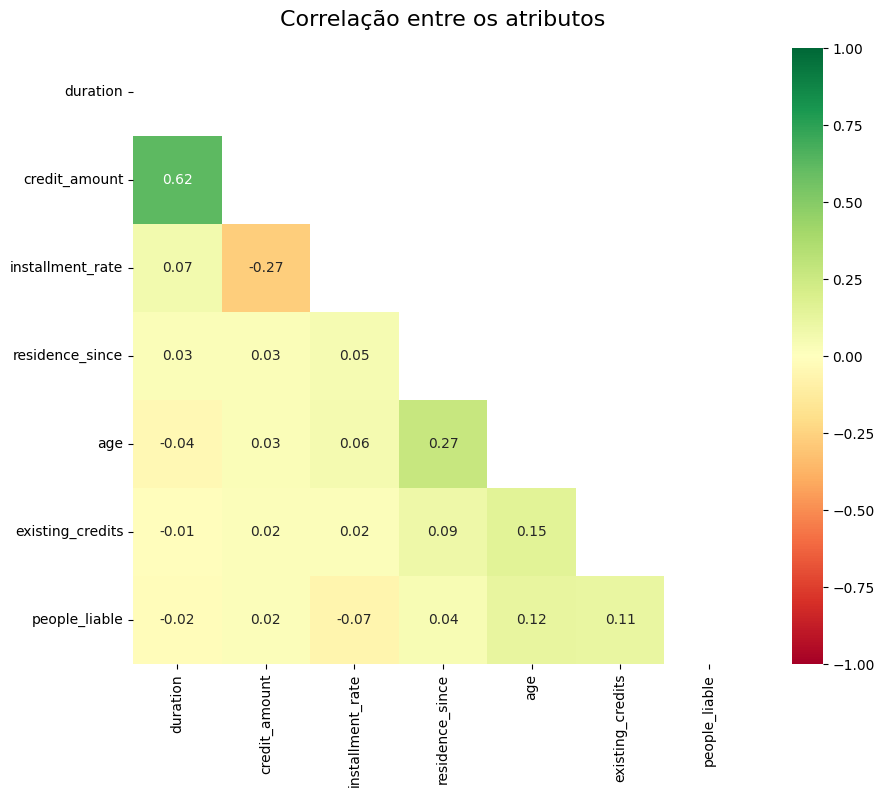

In [31]:
# Criando uma matriz de correlação com um gráfico de calor (heatmap)
plt.figure(figsize=(10, 8))  # Define o tamanho da figura do gráfico de calor

# Definindo uma máscara para ocultar a parte superior da matriz de correlação
# np.triu cria uma matriz triangular superior com 1s acima da diagonal e 0s na diagonal e abaixo
mask = np.triu(np.ones_like(df[num_vars].corr(method='pearson').round(2), dtype=bool))

# Gerando o gráfico de calor (heatmap)
# df[num_vars].corr(method='pearson') calcula a matriz de correlação de Pearson entre as variáveis numéricas
# round(2) arredonda os valores da correlação para duas casas decimais
# O parâmetro mask é utilizado para ocultar a parte superior da matriz, deixando visível apenas a parte inferior (para evitar redundância)
# vmin e vmax definem os valores mínimo e máximo da escala de cores, respectivamente -1 e 1
# annot=True adiciona os valores numéricos de correlação em cada célula
# cmap="RdYlGn" define o mapa de cores, variando de vermelho para verde (indicando correlação negativa e positiva, respectivamente)
# square=False faz com que o gráfico não seja quadrado
# center=0 centraliza o gráfico de calor em torno de 0, destacando correlações negativas e positivas
heatmap = sns.heatmap(df[num_vars].corr(method='pearson').round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlGn", square=False, center=0)

# Adicionando título ao gráfico
heatmap.set_title('Correlação entre os atributos', fontdict={'fontsize': 16}, pad=16)



In [32]:
cor_matrix = df[num_vars].corr().abs()

In [33]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [34]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
to_drop

[]

#### Análise e Insights

Analisando a correlação entre as  variáveis independentes:

Essa verificação é importante para indicar problema de  multicolinearidade, que pode invalidar a capacidade de generalização de modelos preditivos.  Com a matriz de correlação de Pearson foi possível observar que não existe correlação elevada maior do que 0,7 entre as variáveis

#### 4.2.10.Exploração dos dados - Variáveis Categóricas
<a id="exploracao-dados-categoricos"></a>

In [35]:
df[cat_vars].apply( lambda x: x.unique().shape[0] )

status_account        4
credit_history        5
purpose              10
savings_account       5
employment_since      5
personal_status       4
other_debtors         3
property              4
other_installment     3
housing               3
job                   4
telephone             2
foreign_Worker        2
dtype: int64

In [36]:
# Define um threshold (percentual mínimo)
threshold = 5  # Percentual mínimo para ser considerado como "baixo"


# Calcular o percentual de cada categoria para as variáveis categóricas
for var in cat_vars:
    # Calcular a contagem de cada categoria em percentual
    category_counts = df[var].value_counts(normalize=True) * 100  # normalize=True retorna as porcentagens
    
    # Exibir os resultados
    print(f"Percentual de categorias para a variável '{var}':")
    print(category_counts)
    print("\n" + "="*50 + "\n")
    
    # Verificar se existe alguma categoria com menos que o threshold de frequência
    low_percentage_categories = category_counts[category_counts < threshold]
    
    if not low_percentage_categories.empty:
        print(f"Atenção! Para a variável '{var}', as categorias abaixo têm menos de {threshold}% de frequência:")
        for category, percentage in low_percentage_categories.items():
            print(f"Categoria: {category}, Percentual: {percentage:.2f}%")
        print("="*50 + "\n")


Percentual de categorias para a variável 'status_account':
status_account
A14    39.4
A11    27.4
A12    26.9
A13     6.3
Name: proportion, dtype: float64


Percentual de categorias para a variável 'credit_history':
credit_history
A32    53.0
A34    29.3
A33     8.8
A31     4.9
A30     4.0
Name: proportion, dtype: float64


Atenção! Para a variável 'credit_history', as categorias abaixo têm menos de 5% de frequência:
Categoria: A31, Percentual: 4.90%
Categoria: A30, Percentual: 4.00%

Percentual de categorias para a variável 'purpose':
purpose
A43     28.0
A40     23.4
A42     18.1
A41     10.3
A49      9.7
A46      5.0
A45      2.2
A44      1.2
A410     1.2
A48      0.9
Name: proportion, dtype: float64


Atenção! Para a variável 'purpose', as categorias abaixo têm menos de 5% de frequência:
Categoria: A45, Percentual: 2.20%
Categoria: A44, Percentual: 1.20%
Categoria: A410, Percentual: 1.20%
Categoria: A48, Percentual: 0.90%

Percentual de categorias para a variável 'savings_account':

#### Análise e Insights

- As variáveis credit_history, purpose, savings_account, other_debtors, other_installment, job e foreign_Worker possuem pelo menos uma categorias com frequência abaixo de 5% de frequência:
        
- Essa informação é importante para analisar o melhor tratamento para essa variável, visto que
temos um "problema" de alto desbalanceamento entre as categorias


#### 4.2.11.Exploração dos dados - Variáveis Categóricas - Gráficos
<a id="exploracao-dados-categoricos-graficos"></a>

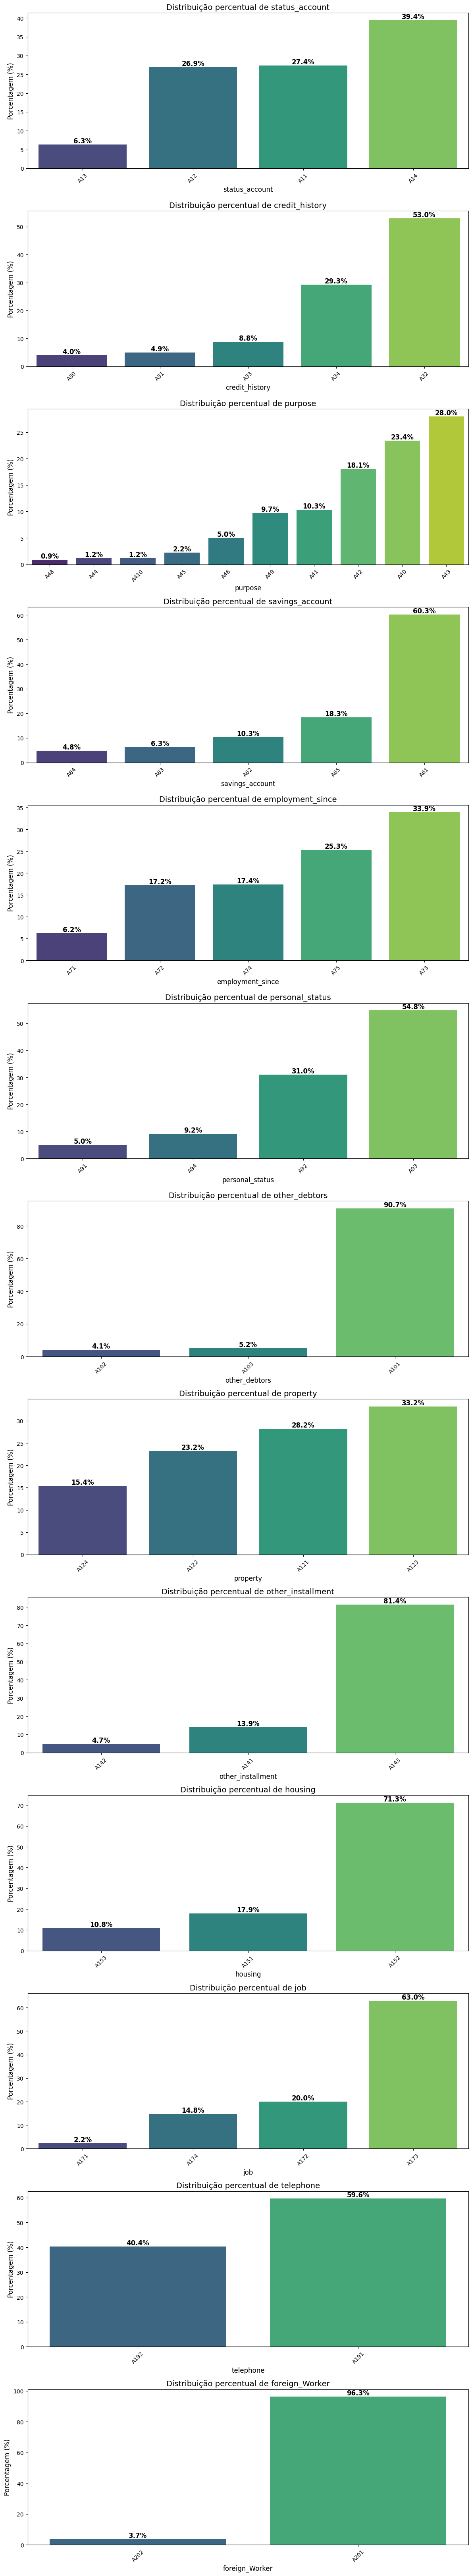

In [37]:
# Criar figuras para os gráficos
fig, axes = plt.subplots(nrows=len(cat_vars), ncols=1, figsize=(12, 5 * len(cat_vars)))

# Criar gráfico de barras para cada variável categórica
for i, var in enumerate(cat_vars):
    # Calcular a distribuição percentual
    value_counts = df[var].value_counts(normalize=True).mul(100).sort_values(ascending=True)
    
    # Criar gráfico de barras com valores em % (percentual)
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette="viridis")
    
    # Adicionar rótulos de percentual em todas as barras
    for p in axes[i].patches:
        # 'p.get_height()' obtém o valor da barra (porcentagem), e 'p.get_x()' + 'p.get_width()/2' obtém a posição central para cada barra
        axes[i].annotate(f'{p.get_height():.1f}%', 
                         (p.get_x() + p.get_width() / 2, p.get_height()),  # Coordenadas do rótulo
                         ha='center', va='bottom',  # Alinha o texto
                         fontsize=12, fontweight='bold')  # Configurações de estilo do texto
    
    # Configurações do gráfico
    axes[i].set_title(f'Distribuição percentual de {var}', fontsize=14)  # Título do gráfico
    axes[i].set_xlabel(var, fontsize=12)  # Rótulo do eixo X
    axes[i].set_ylabel('Porcentagem (%)', fontsize=12)  # Rótulo do eixo Y
    axes[i].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização

# Ajustar o layout para que não sobreponha os gráficos
plt.tight_layout()

# Exibir o gráfico
plt.show()


#### 4.2.12.Análise Exploratória Bivariada - Variáveis Categóricas vs Target - Gráficos
<a id="exploracao-dados-categoricos-graficos-bivariada"></a>

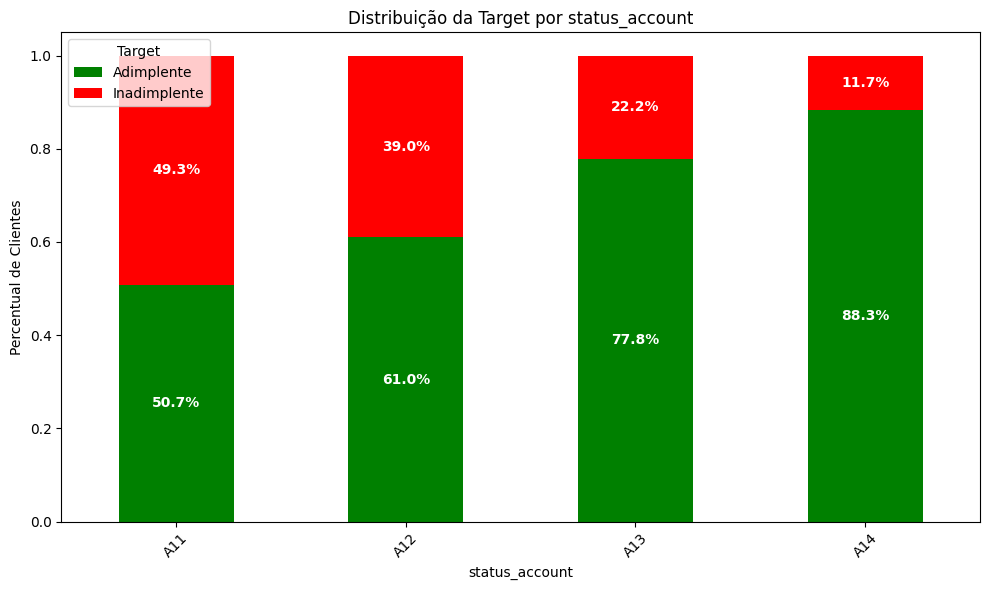

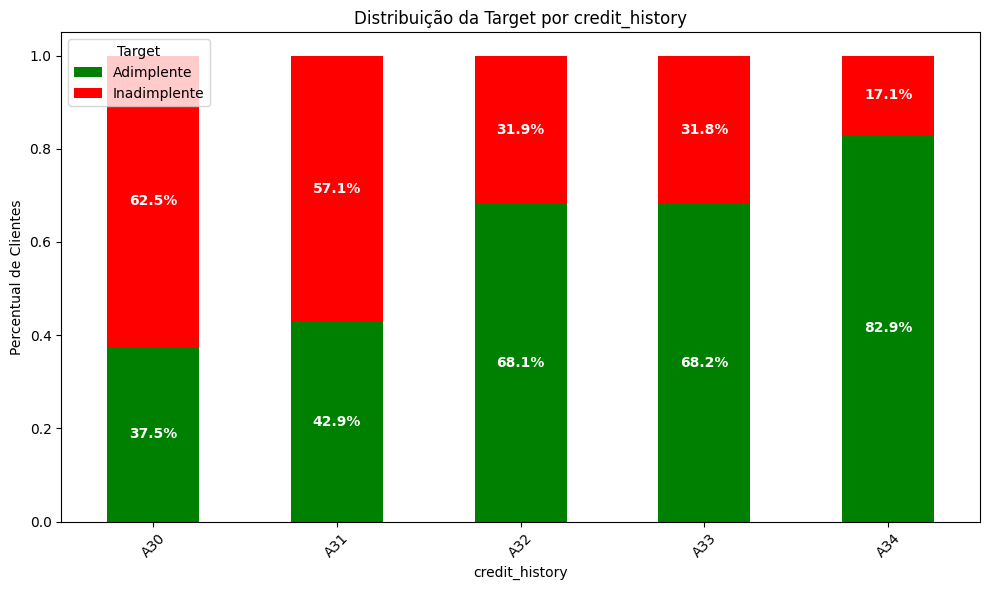

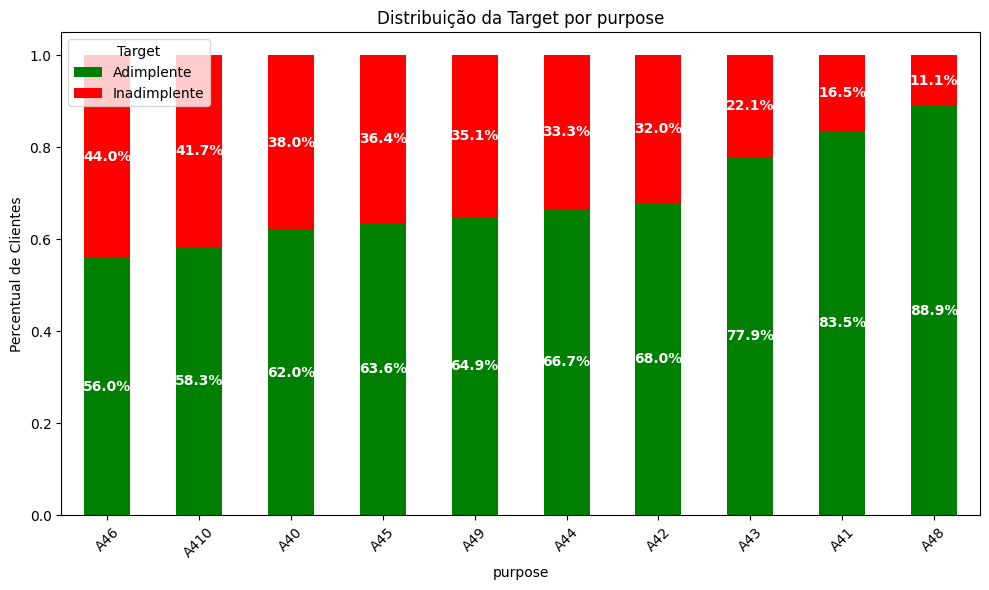

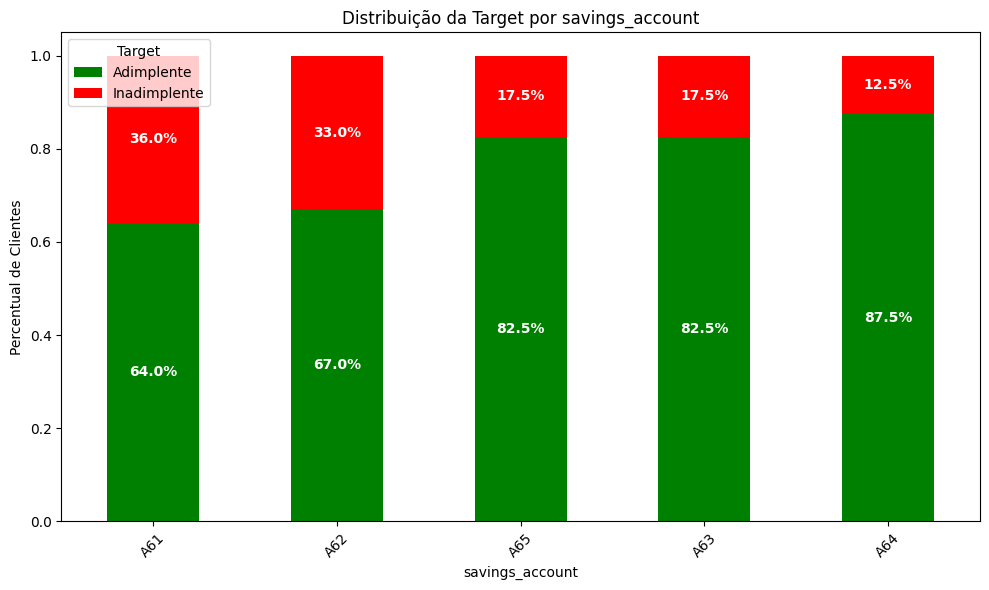

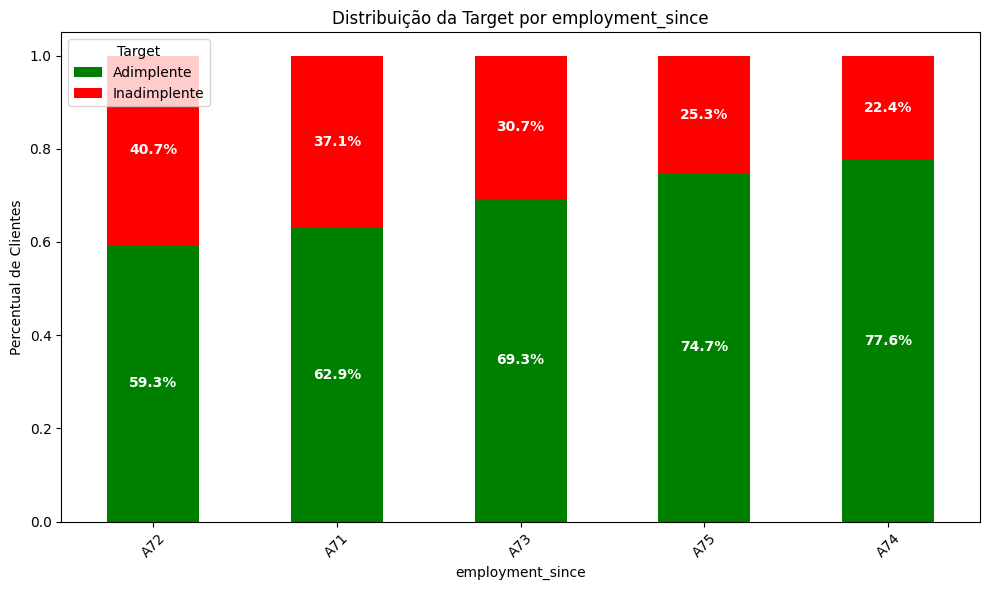

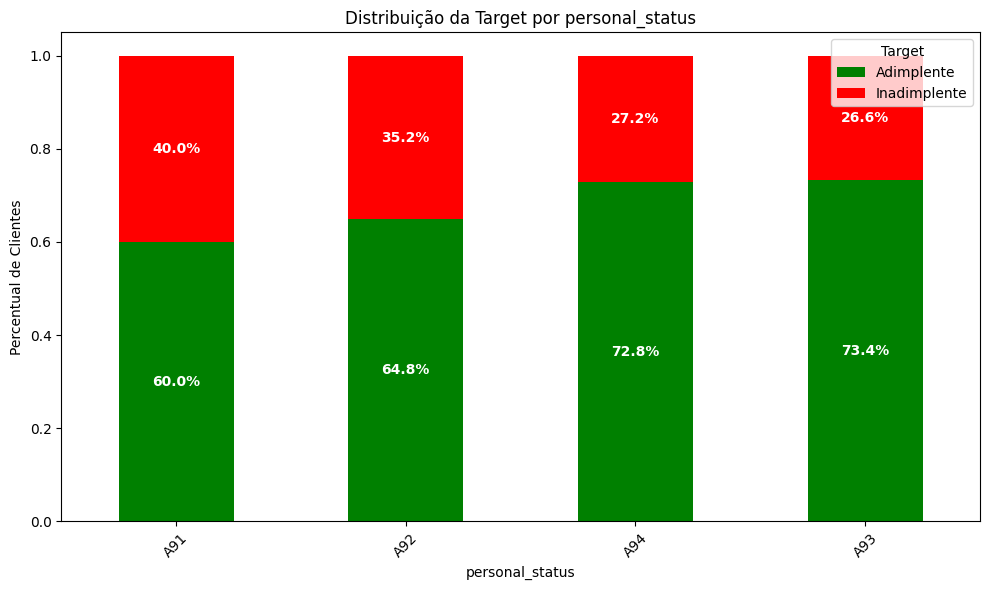

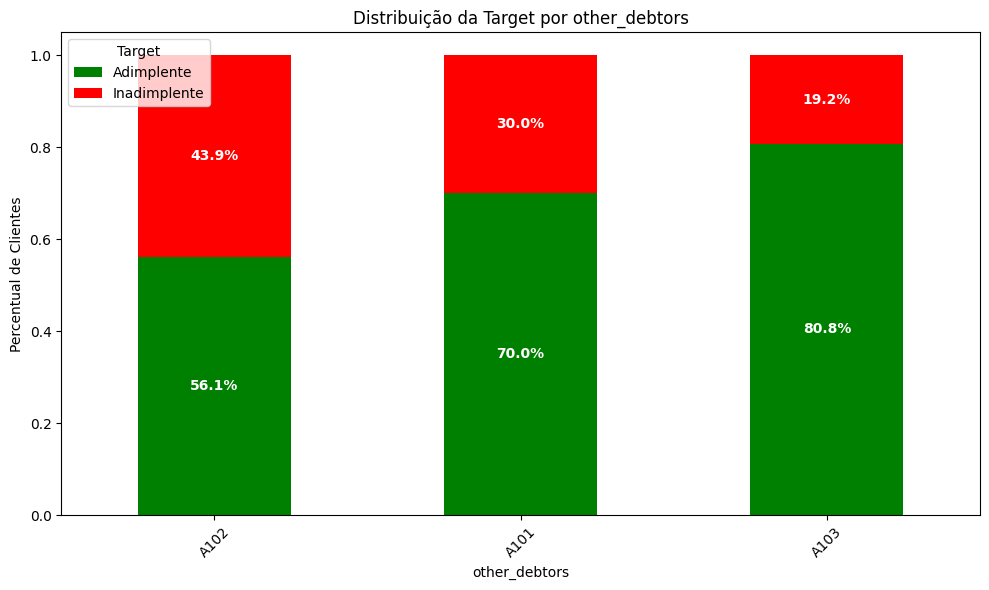

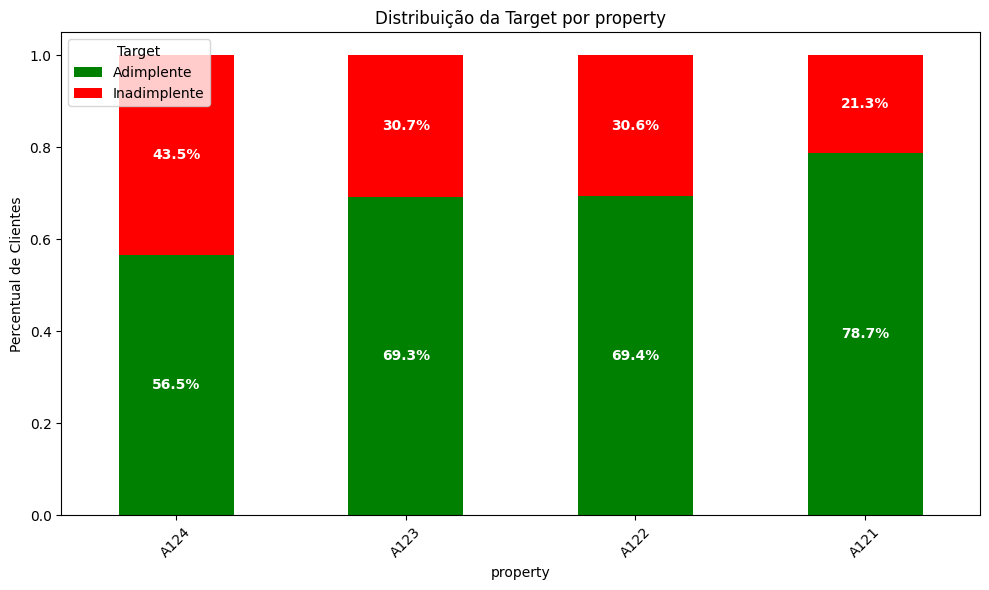

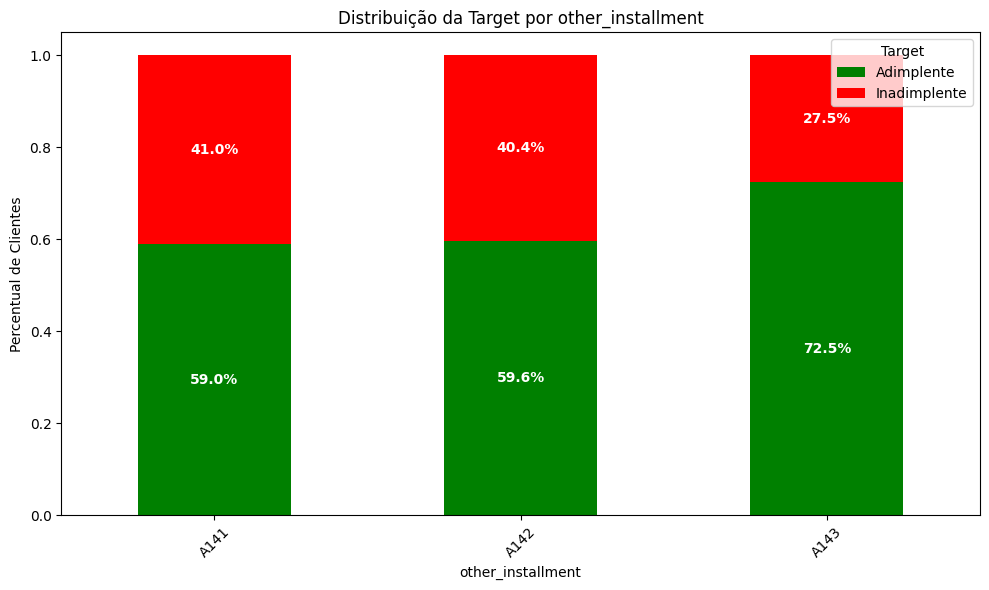

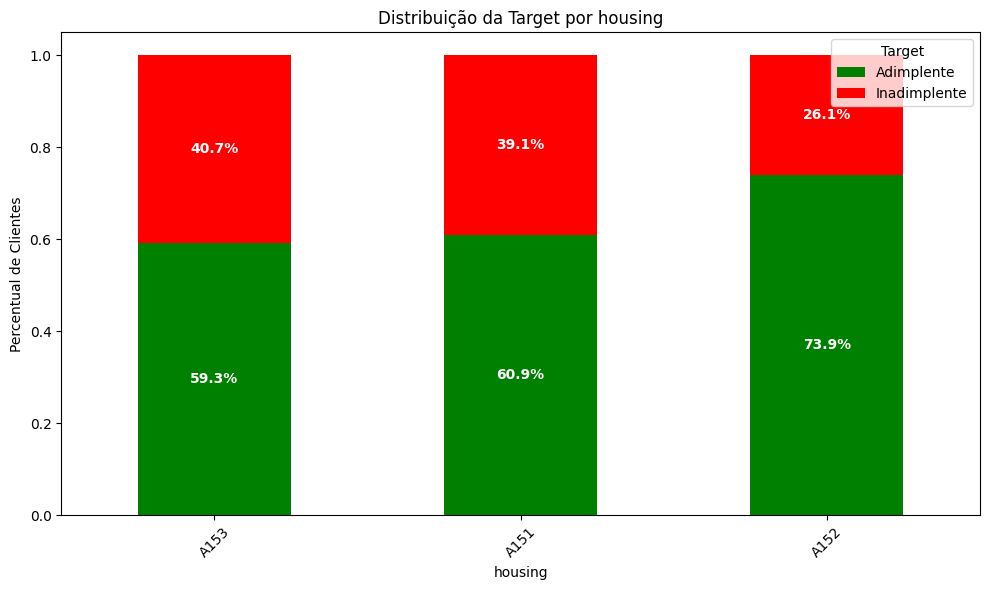

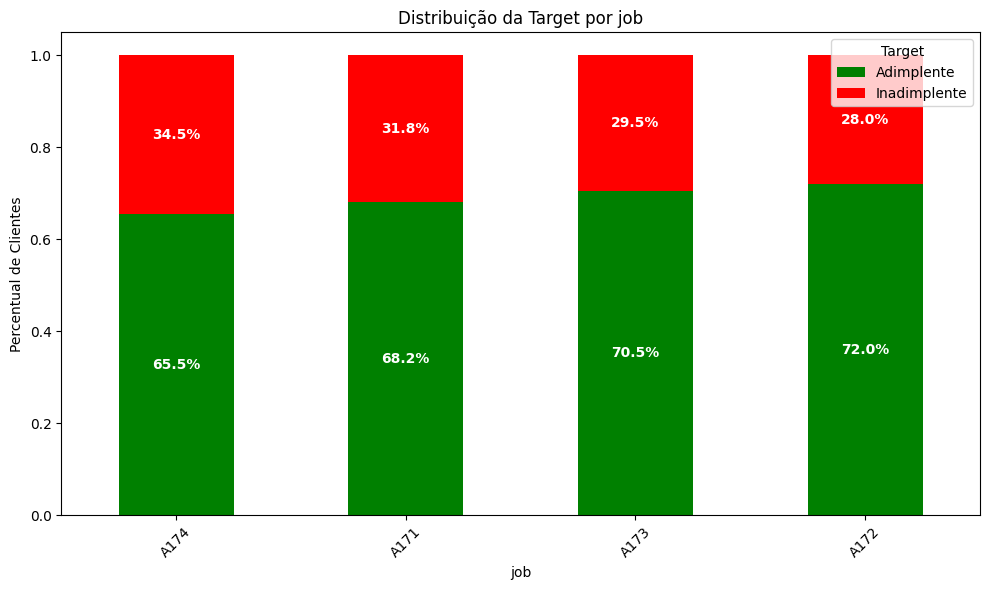

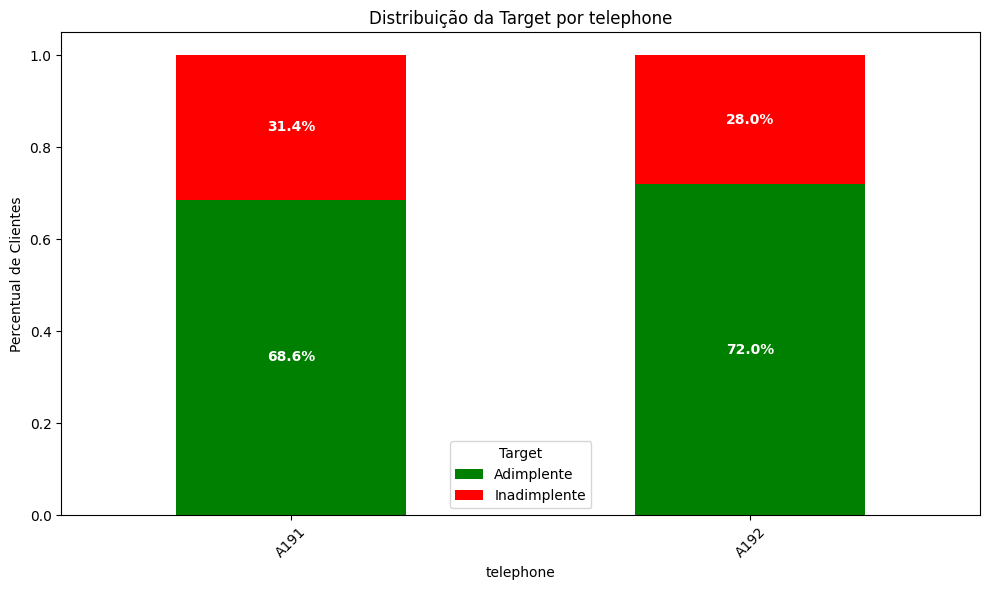

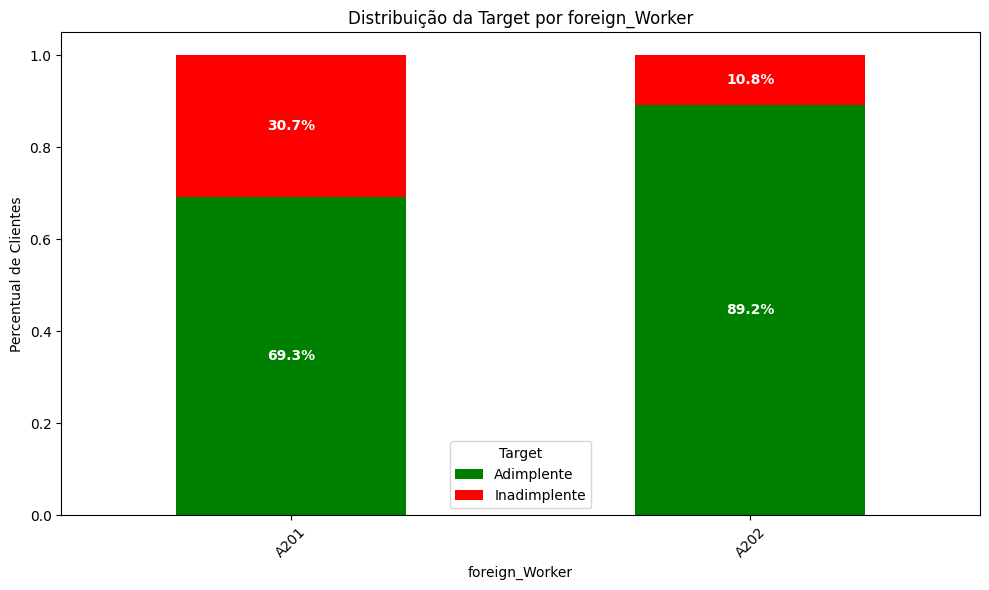

In [38]:
# Plotar gráficos empilhados para cada variável categórica
for cat in cat_vars:
    # Contagem das ocorrências para cada combinação de coluna e da target
    contagem = pd.crosstab(df[cat], df['target'], normalize='index')  # Normalizar para percentual

    # Ordenar as categorias com base no percentual de 'Adimplente' ou 'Inadimplente'
    contagem = contagem.sort_values(by=1, ascending=False)  # Ordena pela coluna 'Adimplente' (1)
    
    # Plotar o gráfico empilhado
    ax = contagem.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
    
    # Adicionar os valores percentuais em cada barra
    for p in ax.patches:
        # Obter a altura da barra (percentual)
        height = p.get_height()
        
        # Posição horizontal do valor
        x_pos = p.get_x() + p.get_width() / 2
        
        # Adicionar texto no gráfico
        ax.text(x_pos, p.get_y() + height / 2, f'{height*100:.1f}%', 
                ha='center', va='center', color='white', fontweight='bold')
    
    # Configurações adicionais
    plt.title(f'Distribuição da Target por {cat}')
    plt.xlabel(cat)
    plt.ylabel('Percentual de Clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Target', labels=['Adimplente', 'Inadimplente'])
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()


#### 4.2.13.Análise Exploratória Bivariada - Variáveis Numéricas vs Target - Gráficos
<a id="exploracao-dados-numericas-graficos-bivariada"></a>

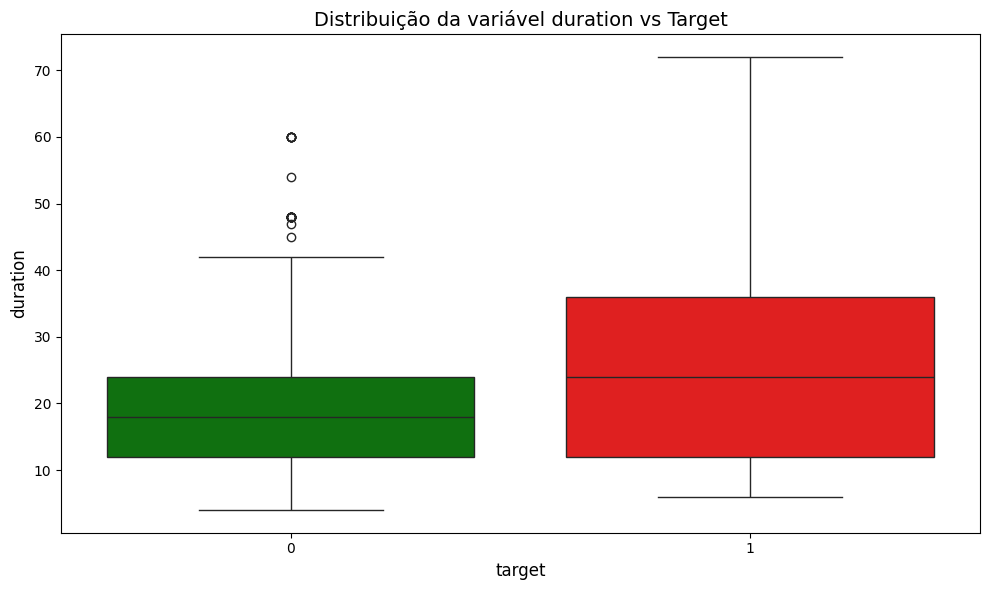

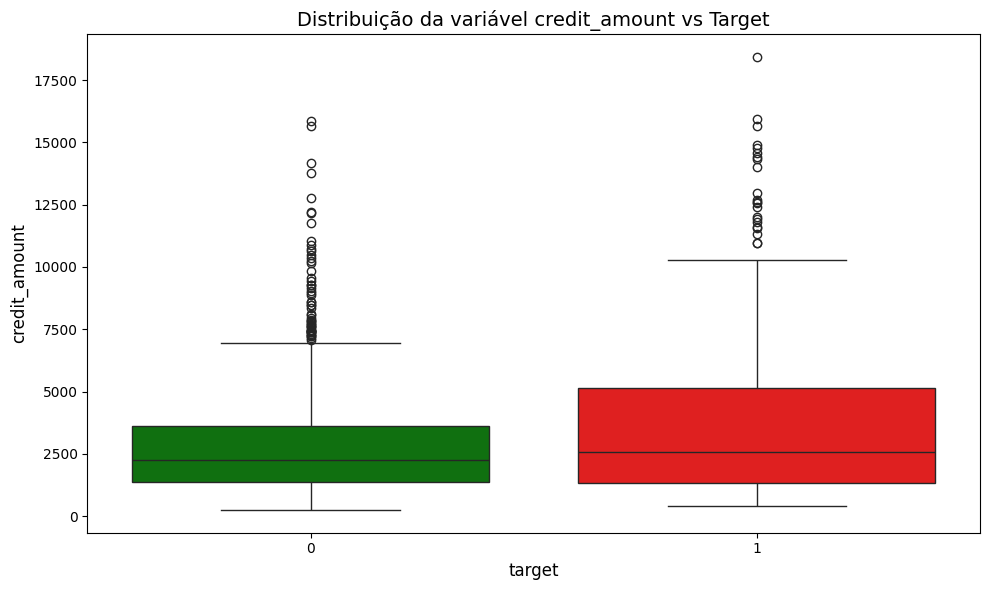

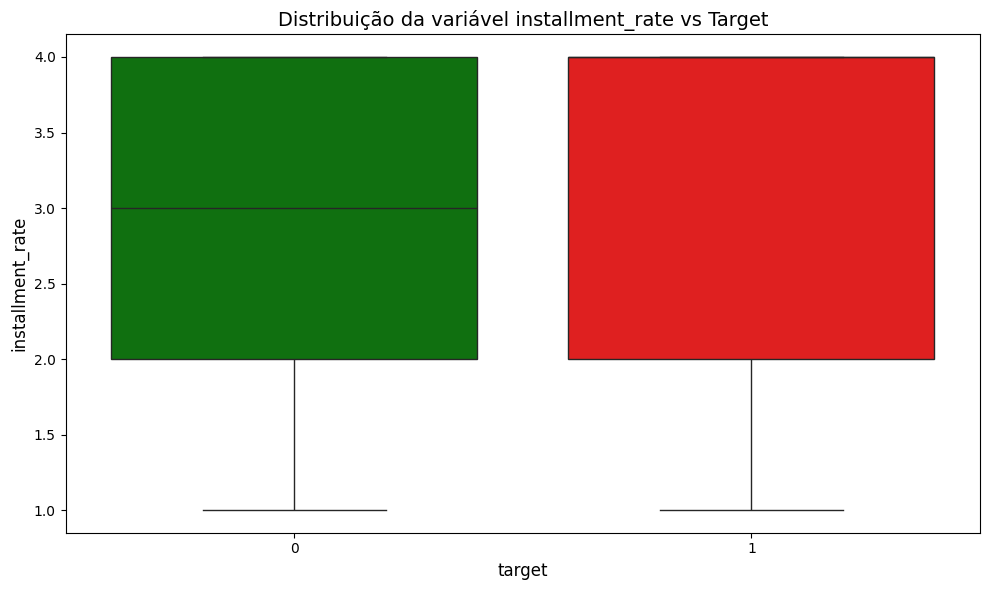

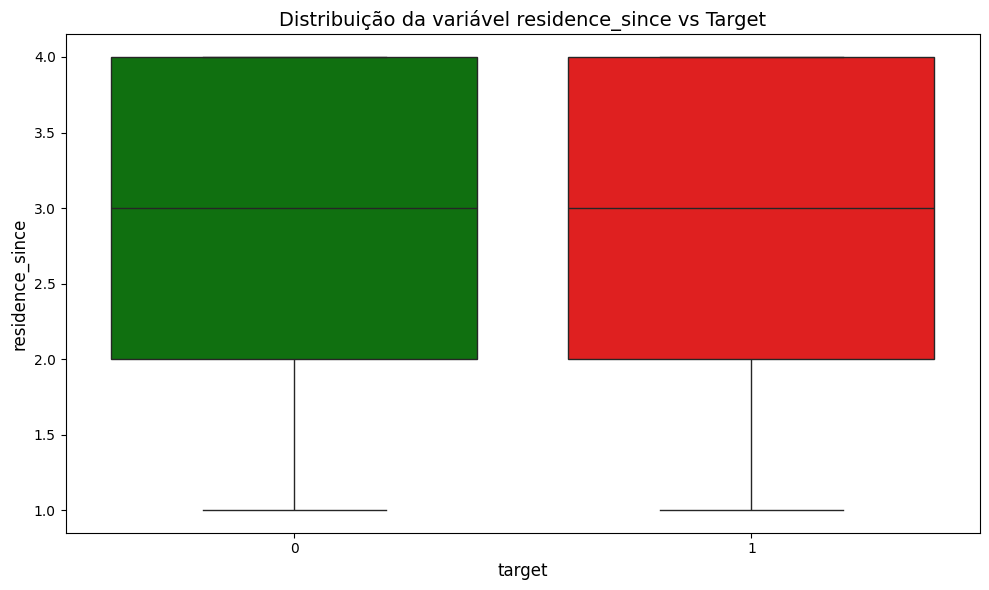

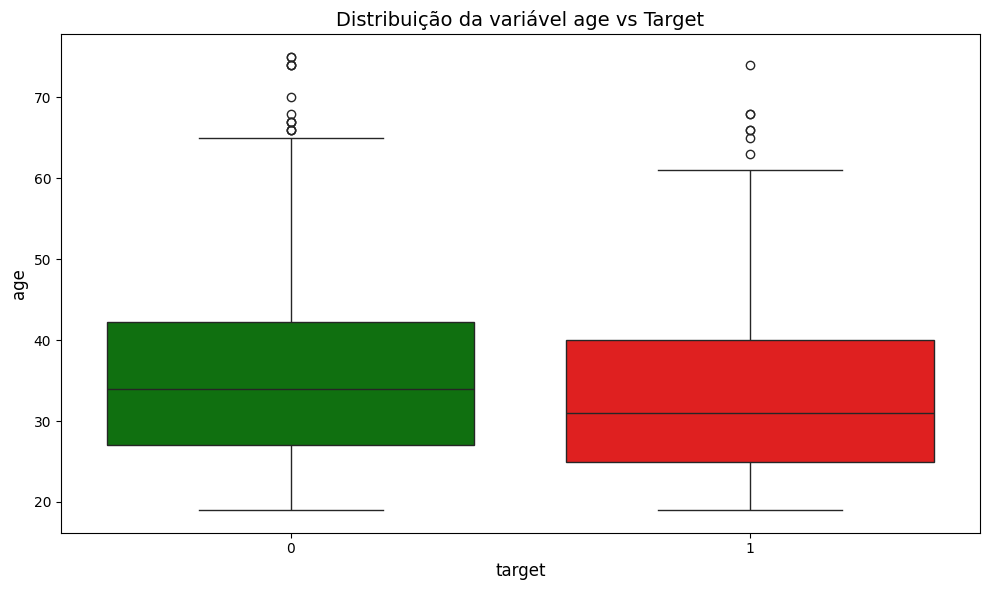

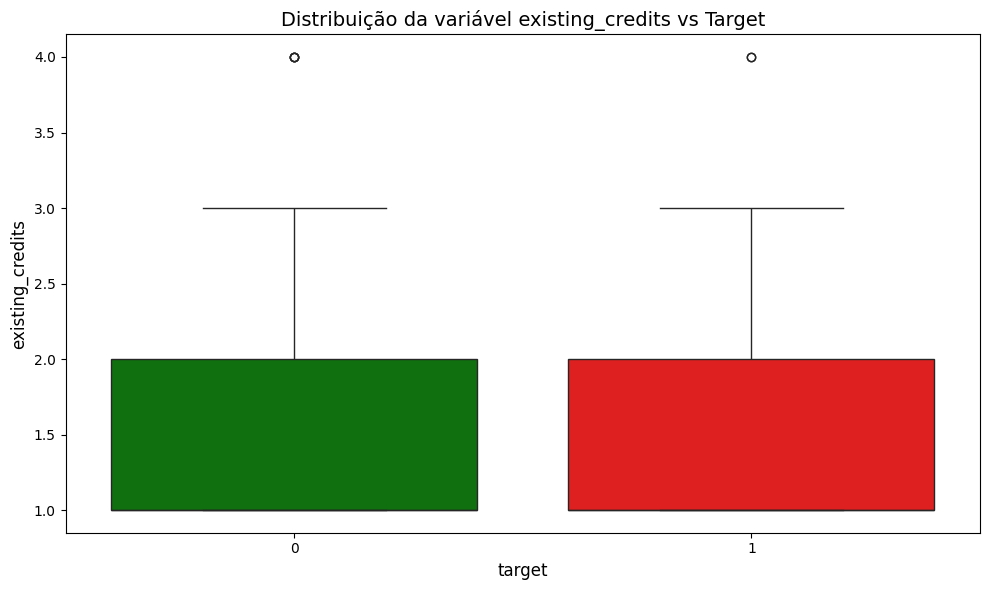

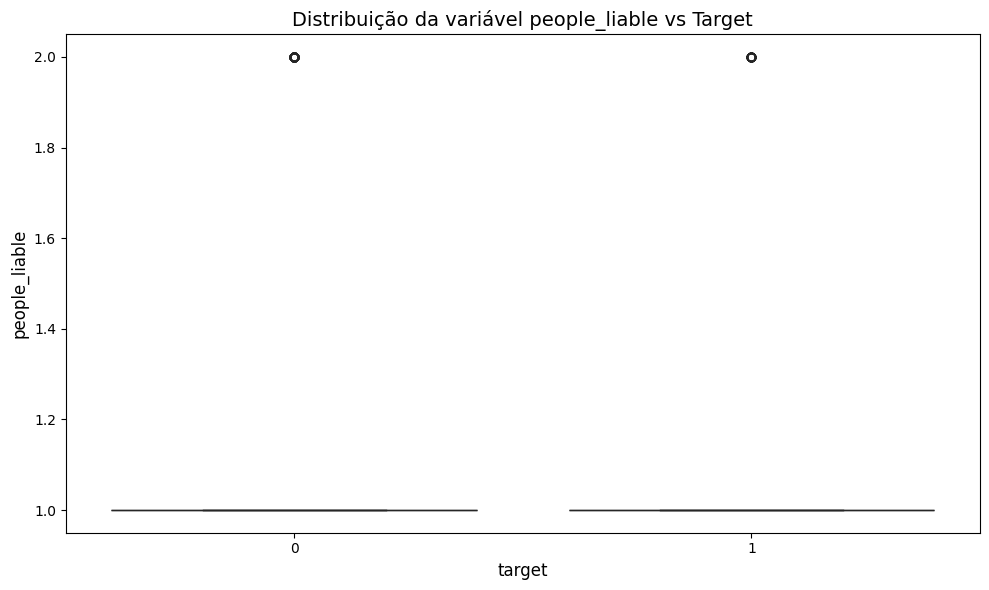

In [39]:
# Plotar Boxplot para cada variável numérica em relação ao target
for num_var in num_vars:  # num_vars é a lista de variáveis numéricas
    plt.figure(figsize=(10, 6))
    
    # Definir uma paleta customizada com as cores verde e vermelho
    custom_palette = ['green', 'red']  # Verde para 'Adimplente' e vermelho para 'Inadimplente'
    
    # Criar o boxplot com as cores ajustadas
    sns.boxplot(x='target', y=num_var, data=df, palette=custom_palette)
    
    # Títulos e rótulos do gráfico
    plt.title(f'Distribuição da variável {num_var} vs Target', fontsize=14)
    plt.xlabel('target', fontsize=12)
    plt.ylabel(num_var, fontsize=12)
    
    # Ajuste no layout para evitar sobreposição
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()


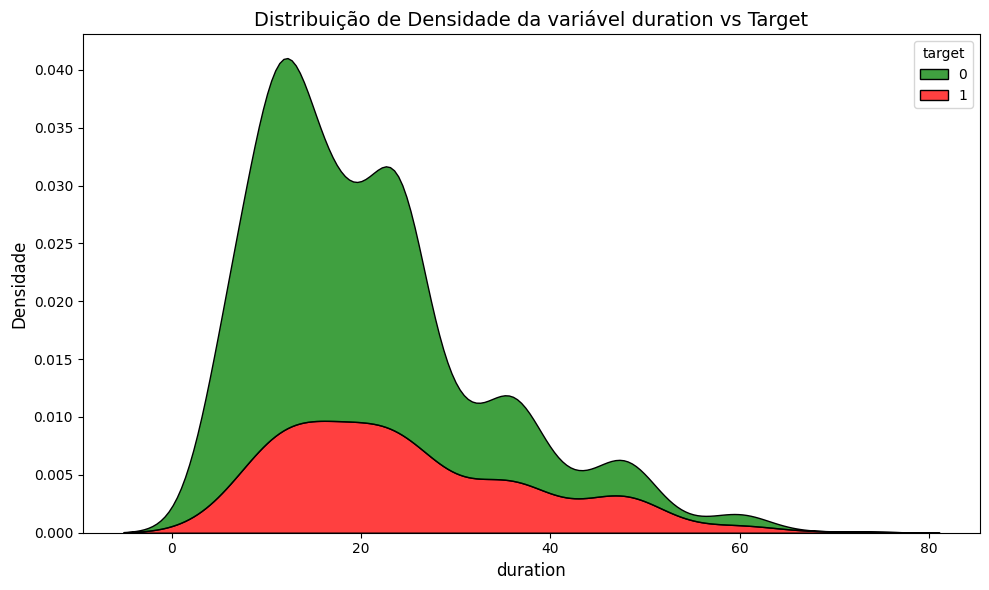

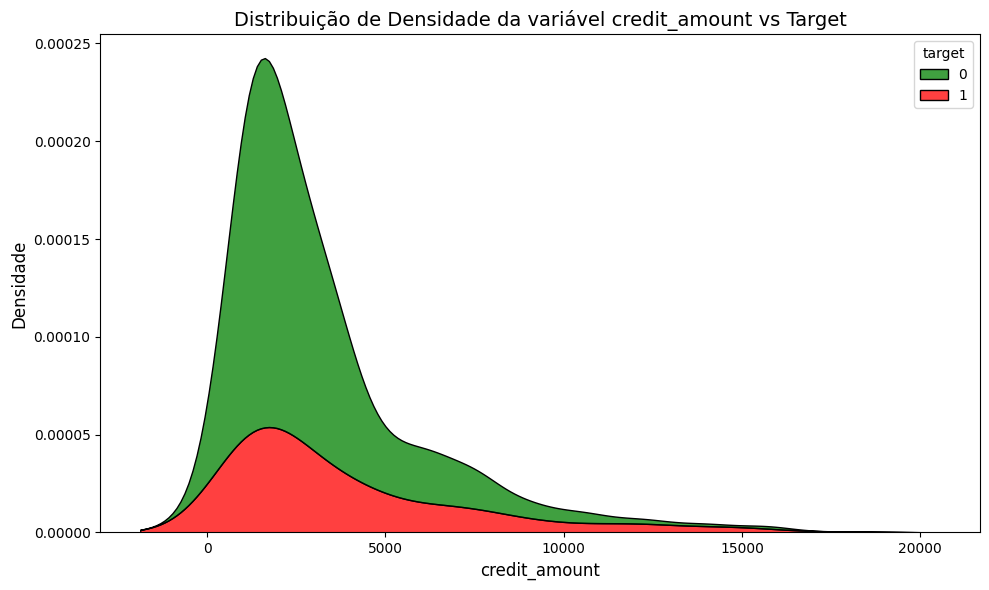

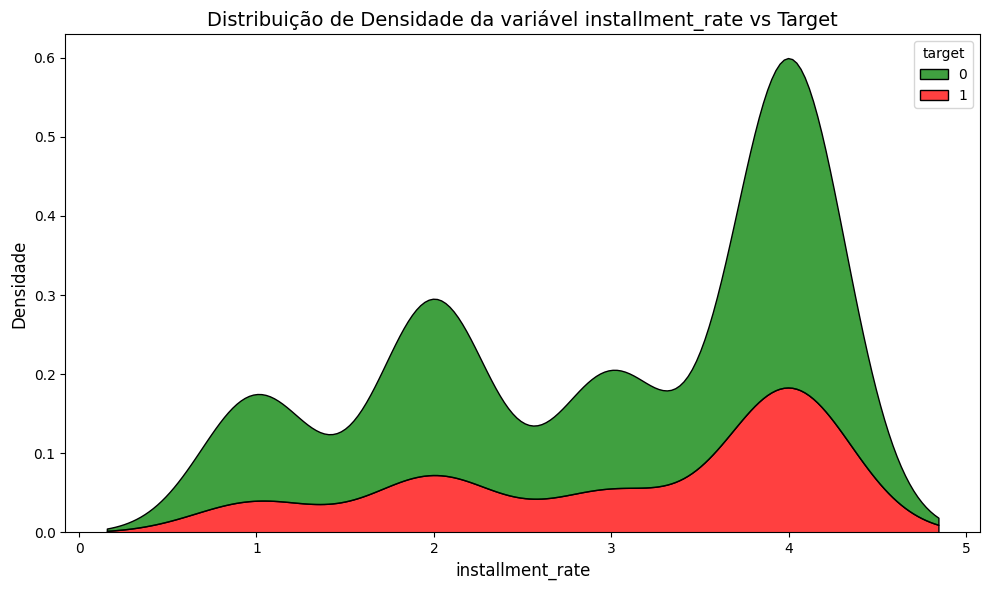

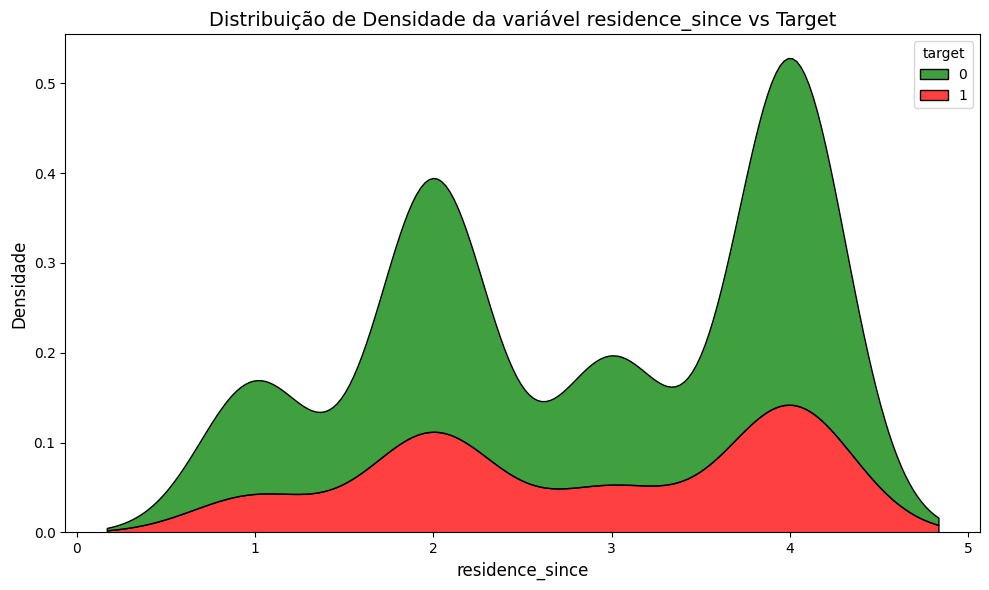

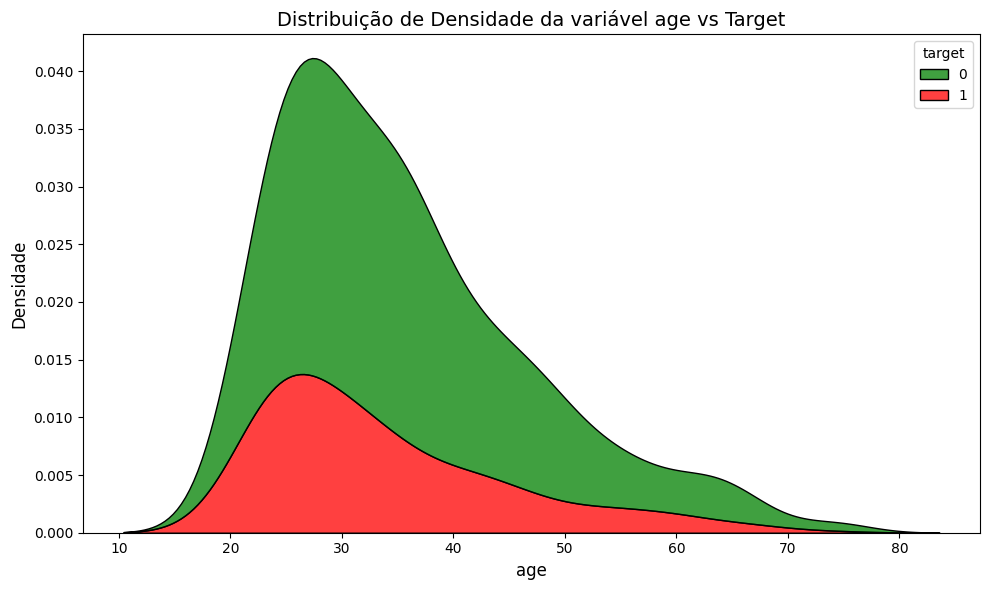

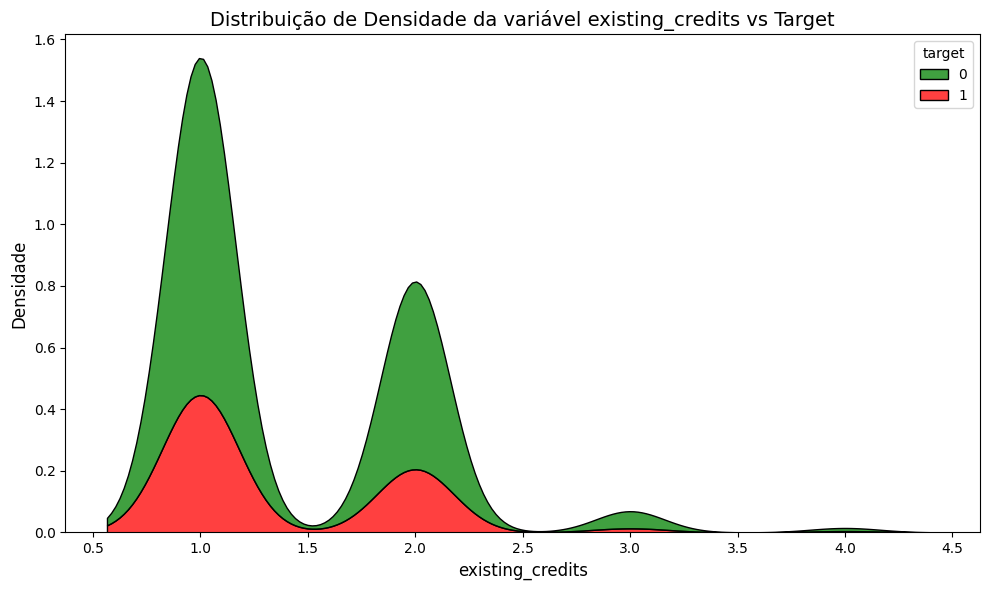

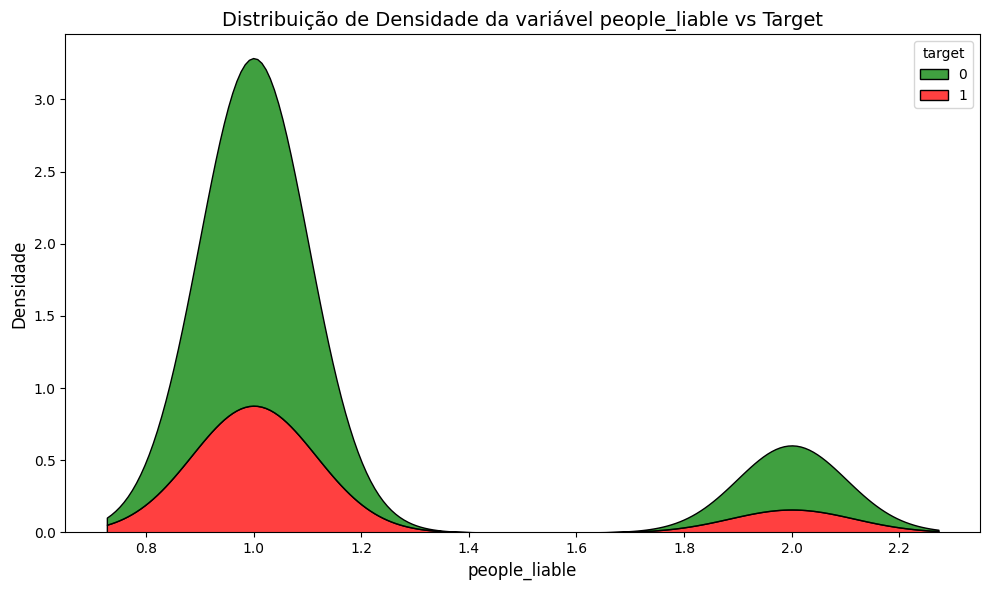

In [40]:
# Plotar gráfico de densidade para cada variável numérica em relação ao target
for num_var in num_vars:  # num_vars é a lista de variáveis numéricas
    plt.figure(figsize=(10, 6))
    
    # Definir uma paleta customizada com as cores verde e vermelho
    custom_palette = ['green', 'red']  # Verde para 'Adimplente' e vermelho para 'Inadimplente'
    
    # Criar o gráfico de densidade (KDE) com as cores ajustadas
    sns.kdeplot(data=df, x=num_var, hue='target', multiple='stack', palette=custom_palette, fill=True)
    
    # Títulos e rótulos do gráfico
    plt.title(f'Distribuição de Densidade da variável {num_var} vs Target', fontsize=14)
    plt.xlabel(num_var, fontsize=12)
    plt.ylabel('Densidade', fontsize=12)
    
    # Ajuste no layout para evitar sobreposição
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()


## 5.Storytelling de Dados: A Jornada de Identificação dos Bons e Maus Pagadores do Banco Alemão
<a id="resumo-analise-exploratoria"></a>

#### 5.1. Hipóteses 01: Clientes mais jovens têm maior risco de inadimplência ?

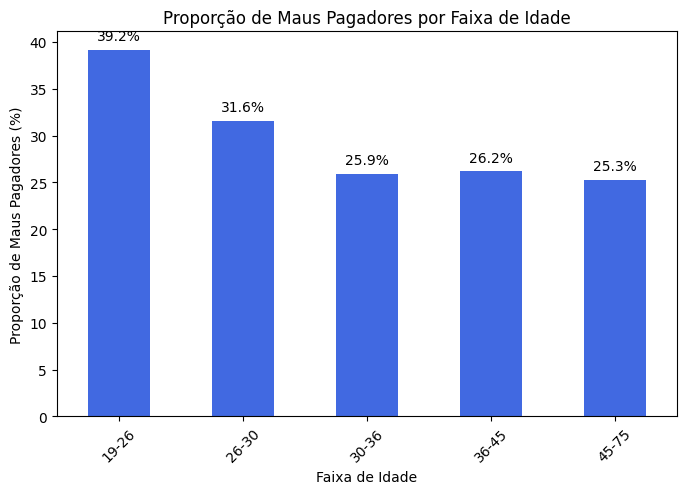


Análise: Sim, conforme apresentado no gráfico, os clientes mais jovens apresentam maior risco de inadimplência, e conseguimos  observar também que a inadimplência vai dimuindo conforme a idade vai aumentando.



In [54]:
# Criando faixas de 25% (quartis) para a variável credit_amount e armazenando os intervalos
df['age_bin'], bins = pd.qcut(df['age'], q=5, retbins=True, labels=False)

# Criando rótulos personalizados com os valores dos intervalos
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
df['age_bin'] = pd.qcut(df['age'], q=5, labels=labels)

# Agrupando pela nova variável e calculando a taxa de maus pagadores
df_grouped = df.groupby('age_bin')['target'].mean() * 100  

# Criando o gráfico
plt.figure(figsize=(8, 5))
df_grouped.sort_index().plot(kind='bar', color='royalblue')

# Personalizando os rótulos e o título
plt.ylabel('Proporção de Maus Pagadores (%)')
plt.xlabel('Faixa de Idade')
plt.title('Proporção de Maus Pagadores por Faixa de Idade')
plt.xticks(rotation=45)

# Exibindo os valores no topo das barras
for i, v in enumerate(df_grouped):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()

print("\nAnálise: Sim, conforme apresentado no gráfico, os clientes mais jovens apresentam maior risco de inadimplência, e conseguimos  observar também que a inadimplência vai dimuindo conforme a idade vai aumentando.\n")

#### 5.2. Hipóteses 02: Clientes com status de conta positivo têm menor risco de inadimplência ?

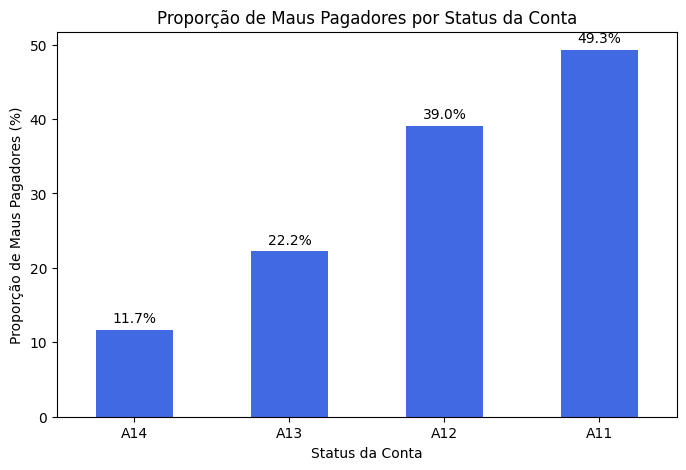

In [45]:
# Agrupando e calculando a média da target por categoria
df_grouped = df.groupby(['status_account'])['target'].mean() * 100  # Convertendo para %

# Criando o gráfico
plt.figure(figsize=(8, 5))
df_grouped.sort_values().plot(kind='bar', color='royalblue')

# Personalizando os rótulos e o título
plt.ylabel('Proporção de Maus Pagadores (%)')
plt.xlabel('Status da Conta')
plt.title('Proporção de Maus Pagadores por Status da Conta')
plt.xticks(rotation=0)

# Exibindo os valores no topo das barras
for i, v in enumerate(df_grouped.sort_values()):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)


In [58]:
print("\nAnálise: Sim, clientes que têm uma conta corrente estável e com saldo positivo, podemos ver um padrão claro: esses clientes são bons pagadores. Por outro lado, aqueles com saldos negativos em suas contas ou mesmo sem conta corrente demonstram são mais arriscados.\n")



Análise: Sim, clientes que têm uma conta corrente estável e com saldo positivo, podemos ver um padrão claro: esses clientes são bons pagadores. Por outro lado, aqueles com saldos negativos em suas contas ou mesmo sem conta corrente demonstram são mais arriscados.



#### 5.3. Hipóteses 03: Clientes com uma maior duração de empréstimo apresentam maior risco de inadimplência ?

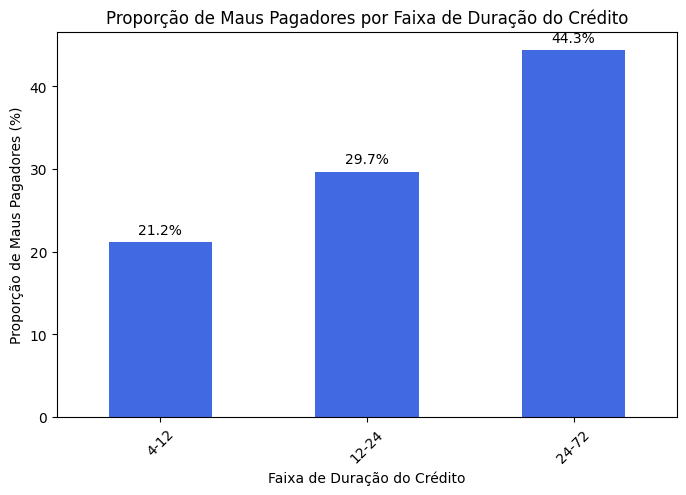


Análise: Sim, clientes com prazos mais longos apresentam maior inadimplência



In [59]:
# Criando faixas de 25% (quartis) para a variável duration e armazenando os intervalos
df['duration_bin'], bins = pd.qcut(df['duration'], q=3, retbins=True, labels=False)

# Criando rótulos personalizados com os valores dos intervalos
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
df['duration_bin'] = pd.qcut(df['duration'], q=3, labels=labels)

# Agrupando pela nova variável e calculando a taxa de maus pagadores
df_grouped = df.groupby('duration_bin')['target'].mean() * 100  

# Criando o gráfico
plt.figure(figsize=(8, 5))
df_grouped.sort_index().plot(kind='bar', color='royalblue')

# Personalizando os rótulos e o título
plt.ylabel('Proporção de Maus Pagadores (%)')
plt.xlabel('Faixa de Duração do Crédito')
plt.title('Proporção de Maus Pagadores por Faixa de Duração do Crédito')
plt.xticks(rotation=45)

# Exibindo os valores no topo das barras
for i, v in enumerate(df_grouped):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()



print("\nAnálise: Sim, clientes com prazos mais longos apresentam maior inadimplência\n")


#### 5.4. Hipóteses 04: Clientes com uma taxa de parcelamento mais baixa apresentam menor risco de inadimplência ?

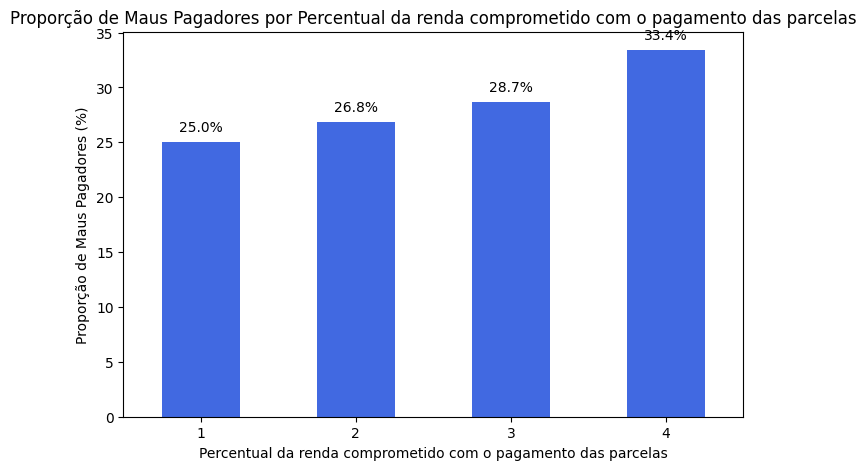


Análise: Sim, quanto maior a taxa de parcelamento,  maior o risco de crédito.



In [60]:
# Agrupando e calculando a média da target por categoria
df_grouped = df.groupby(['installment_rate'])['target'].mean() * 100  # Convertendo para %

# Criando o gráfico
plt.figure(figsize=(8, 5))
df_grouped.sort_values().plot(kind='bar', color='royalblue')

# Personalizando os rótulos e o título
plt.ylabel('Proporção de Maus Pagadores (%)')
plt.xlabel('Percentual da renda comprometido com o pagamento das parcelas')
plt.title('Proporção de Maus Pagadores por Percentual da renda comprometido com o pagamento das parcelas')
plt.xticks(rotation=0)

# Exibindo os valores no topo das barras
for i, v in enumerate(df_grouped.sort_values()):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()

print("\nAnálise: Sim, quanto maior a taxa de parcelamento,  maior o risco de crédito.\n")


#### 5.5. Hipóteses 05: Clientes sem propriedade têm maior risco de inadimplência ?

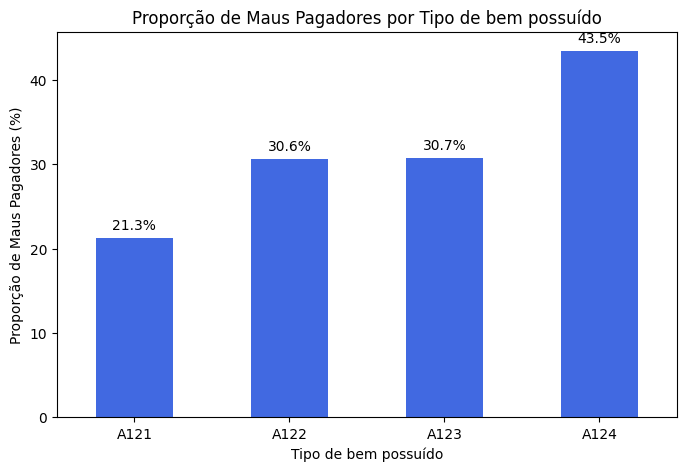


Análise: Sim, clientes que não possuem imóveis ou veículos apresentam maior risco de inadimplência.



In [62]:
# Agrupando e calculando a média da target por categoria
df_grouped = df.groupby(['property'])['target'].mean() * 100  # Convertendo para %

# Criando o gráfico
plt.figure(figsize=(8, 5))
df_grouped.sort_values().plot(kind='bar', color='royalblue')

# Personalizando os rótulos e o título
plt.ylabel('Proporção de Maus Pagadores (%)')
plt.xlabel('Tipo de bem possuído')
plt.title('Proporção de Maus Pagadores por Tipo de bem possuído')
plt.xticks(rotation=0)

# Exibindo os valores no topo das barras
for i, v in enumerate(df_grouped.sort_values()):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()

print("\nAnálise: Sim, clientes que não possuem imóveis ou veículos apresentam maior risco de inadimplência.\n")


## 6. Perfis de Risco de Crédito: Características de Bons e Maus Clientes
<a id="conclusao"></a>

In [76]:
# Substitua por nome correto da coluna caso necessário, por exemplo 'credit_status'
status_column = 'target'

# Variáveis de interesse
columns_of_interest = ['age','residence_since', 'credit_amount',
    'duration', 'installment_rate','existing_credits'
]

# Separando os clientes em bons e maus
bons_clientes = df[df[status_column] == 0]
maus_clientes = df[df[status_column] == 1]

# Calculando as estatísticas descritivas para os bons clientes
stat_bons = bons_clientes[columns_of_interest].describe(percentiles=[.5])  # Mediana (50%)
stat_bons = stat_bons.rename(columns={"50%": "median"})

# Calculando as estatísticas descritivas para os maus clientes
stat_maus = maus_clientes[columns_of_interest].describe(percentiles=[.5])  # Mediana (50%)
stat_maus = stat_maus.rename(columns={"50%": "median"})

# Exibindo os resultados para bons e maus clientes
print("Estatísticas dos Bons Clientes:")
print(stat_bons)

print("\nEstatísticas dos Maus Clientes:")
print(stat_maus)


Estatísticas dos Bons Clientes:
              age  residence_since  credit_amount    duration  installment_rate  existing_credits
count  700.000000       700.000000     700.000000  700.000000        700.000000        700.000000
mean    36.224286         2.842857    2985.457143   19.207143          2.920000          1.424286
std     11.381145         1.108373    2401.472278   11.079564          1.128078          0.584721
min     19.000000         1.000000     250.000000    4.000000          1.000000          1.000000
50%     34.000000         3.000000    2244.000000   18.000000          3.000000          1.000000
max     75.000000         4.000000   15857.000000   60.000000          4.000000          4.000000

Estatísticas dos Maus Clientes:
              age  residence_since  credit_amount    duration  installment_rate  existing_credits
count  300.000000       300.000000     300.000000  300.000000        300.000000        300.000000
mean    33.963333         2.850000    3938.126667   2

**Bom Cliente**

- Status Bancário: Conta estável, bom histórico de crédito.
- Histórico de Crédito: Sem inadimplências, histórico mais positivo.
- Emprego: Possuem emprego fixo.
- Idade e Estado Civil: Mais velhos, frequentemente casados



Os bons clientes geralmente apresentam uma idade média de 36 anos, o que reflete uma fase de maior estabilidade e experiência financeira. A questão da habitação também é significativa, pois esses clientes tendem a viver em propriedades próprias ou em alugueis estáveis há mais tempo, indicando uma vida residencial segura e uma sólida base de estabilidade. Além disso, o histórico de crédito desses clientes é mais positivo, o que os torna confiáveis no pagamento de suas dívidas. Eles também solicitam valores de empréstimos mais modestos, com uma média de R$ 2.985, e preferem prazos mais curtos para o pagamento, com uma duração média de cerca de 1 ano e 9 meses. Isso resulta em uma taxa de parcelamento mais baixa, cerca de 2,92\%, o que demonstra um comportamento financeiro controlado. Por fim, esses clientes costumam ter empregos estáveis, ocupando cargos fixos em empresas privadas ou em serviços públicos, o que garante uma fonte de renda segura e contínu, refletindo um padrão financeiro menos arriscado e com menor potencial de inadimplência.


**Mau Cliente**

- Status Bancário: Contas instáveis, histórico de falhas em pagamentos.
- Histórico de Crédito: Inadimplente ou com falhas recorrentes.
- Emprego: Possuem empregos temporários ou com alta rotatividade.
- Idade e Estado Civil: Mais jovens ou sem estabilidade profissional.


Os maus clientes, em geral, são um pouco mais jovens, com uma idade média de 33 anos. Esses clientes frequentemente ocupam empregos temporários ou instáveis, o que compromete a segurança de sua renda. Além disso, eles costumam não contar com garantias financeiras, como propriedades ou bens, que possam ser usados para cobrir eventuais dívidas. O histórico de crédito desses clientes tende a ser negativo, o que aumenta o risco de inadimplência. Eles também solicitam empréstimos de valores mais elevados, com uma média de R$ 3.938, e optam por prazos mais longos para o pagamento, cerca de 2 anos, o que eleva a taxa de parcelamento para uma média de 3,09%. Esses fatores refletem um padrão financeiro mais arriscado e com maior potencial de inadimplência.